# Football AI

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/roboflow/sports)
[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/camera-calibration-sports-computer-vision/)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://www.youtube.com/watch?v=aBVGKoNZQUw)

Let's build a Football AI system to dig deeper into match stats! We'll use computer vision and machine learning to track players, determine which team is which, and even calculate stuff like ball possession and speed. This tutorial is perfect if you want to get hands-on with sports analytics and see how AI can take your football analysis to the next level.

![football AI diagram](https://media.roboflow.com/notebooks/examples/football-ai-diagram.png)

## Before you start

### Configure your API keys

- Open your [`HuggingFace Settings`](https://huggingface.co/settings) page. Click `Access Tokens` then `New Token` to generate new token.
- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store HuggingFace Access Token under the name `HF_TOKEN`.
    - Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Select the runtime

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Jul 31 13:59:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install dependencjes

**Note:** Let's install the `inference-gpu` library, which will be used to efficiently run our object detection and keypoint detection models on GPUs.

In [2]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.0 MB/s eta 0

**Note:** Let's install the sports repository directly from GitHub. The sports repository contains a variety of football-related utilities that we'll use along the way.

In [3]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


**Note:** Let's make sure we have the latest features in the supervision library by installing version `0.23.0` or higher.

In [4]:
!pip list | grep supervision

supervision                           0.25.1


In [15]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

**Note:** Let's download a few sample videos from the [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout) Kaggle competition using gdown.



In [6]:
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 52.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 37.7MB/s]


In [7]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

## ball, player, goalkeeper and referee detection

In [18]:
from ultralytics import YOLO
PLAYER_DETECTION_MODEL = YOLO("/content/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


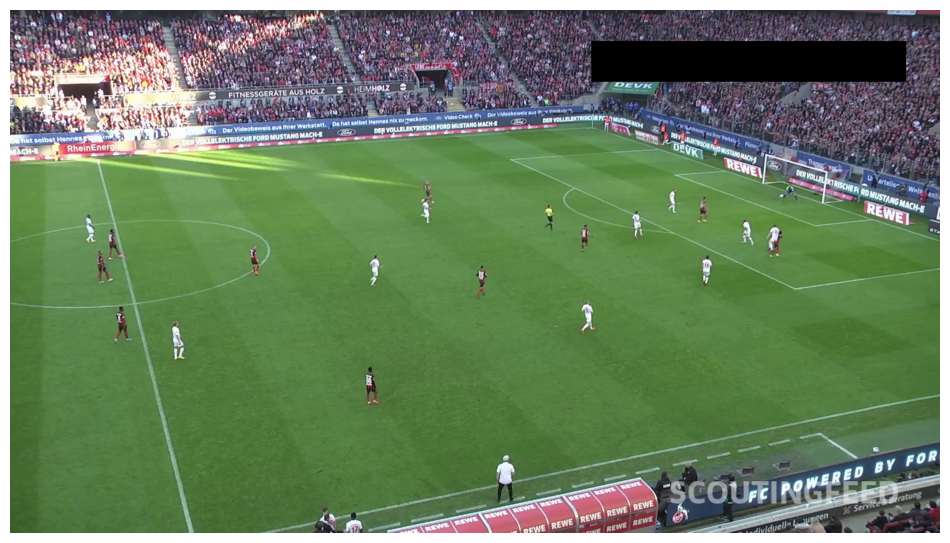

In [10]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/573e61_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

## video game style visualization

## split players into teams

![football AI diagram](https://media.roboflow.com/notebooks/examples/football-ai-team-clustering.png)

**Note:** Before training our player clustering model, we need to gather training data. To do this, we'll sample one frame per second, detect players within those frames, and then crop them out.

In [19]:
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/573e61_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

collecting crops: 0it [00:00, ?it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 242.5ms
Speed: 35.5ms preprocess, 242.5ms inference, 739.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 1it [00:16, 16.23s/it]


0: 384x640 20 players, 2 referees, 55.2ms
Speed: 4.7ms preprocess, 55.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 2it [00:16,  7.07s/it]


0: 384x640 19 players, 38.8ms
Speed: 11.9ms preprocess, 38.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 3it [00:17,  4.12s/it]


0: 384x640 21 players, 2 referees, 31.2ms
Speed: 4.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 4it [00:18,  2.72s/it]


0: 384x640 20 players, 2 referees, 34.2ms
Speed: 4.7ms preprocess, 34.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 5it [00:18,  1.95s/it]


0: 384x640 21 players, 2 referees, 55.8ms
Speed: 11.6ms preprocess, 55.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 6it [00:19,  1.51s/it]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 65.7ms
Speed: 35.1ms preprocess, 65.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 7it [00:20,  1.25s/it]


0: 384x640 1 ball, 1 goalkeeper, 21 players, 1 referee, 75.2ms
Speed: 7.6ms preprocess, 75.2ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 8it [00:21,  1.21s/it]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 39.8ms
Speed: 16.6ms preprocess, 39.8ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 9it [00:22,  1.13s/it]


0: 384x640 21 players, 36.8ms
Speed: 8.8ms preprocess, 36.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 10it [00:22,  1.04it/s]


0: 384x640 20 players, 1 referee, 39.0ms
Speed: 22.8ms preprocess, 39.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 11it [00:23,  1.23it/s]


0: 384x640 1 ball, 19 players, 40.3ms
Speed: 4.5ms preprocess, 40.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 12it [00:23,  1.34it/s]


0: 384x640 20 players, 1 referee, 31.0ms
Speed: 4.9ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 13it [00:24,  1.50it/s]


0: 384x640 20 players, 2 referees, 41.4ms
Speed: 8.9ms preprocess, 41.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 14it [00:24,  1.55it/s]


0: 384x640 19 players, 1 referee, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 15it [00:25,  1.67it/s]


0: 384x640 19 players, 2 referees, 44.1ms
Speed: 4.6ms preprocess, 44.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 16it [00:25,  1.71it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 35.6ms
Speed: 24.9ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 17it [00:26,  1.71it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 35.5ms
Speed: 6.6ms preprocess, 35.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 18it [00:26,  1.78it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 36.2ms
Speed: 4.4ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 19it [00:27,  1.79it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 37.7ms
Speed: 4.0ms preprocess, 37.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 20it [00:27,  1.93it/s]


0: 384x640 1 ball, 18 players, 3 referees, 57.9ms
Speed: 4.9ms preprocess, 57.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 21it [00:28,  1.99it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 30.9ms
Speed: 4.4ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 22it [00:28,  2.10it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 58.2ms
Speed: 5.7ms preprocess, 58.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 23it [00:29,  2.11it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 30.9ms
Speed: 4.6ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 24it [00:29,  1.99it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 52.0ms
Speed: 4.7ms preprocess, 52.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 25it [00:30,  1.24s/it]


**Note:** Here's a sample (100 elements) of the crops we've gathered.

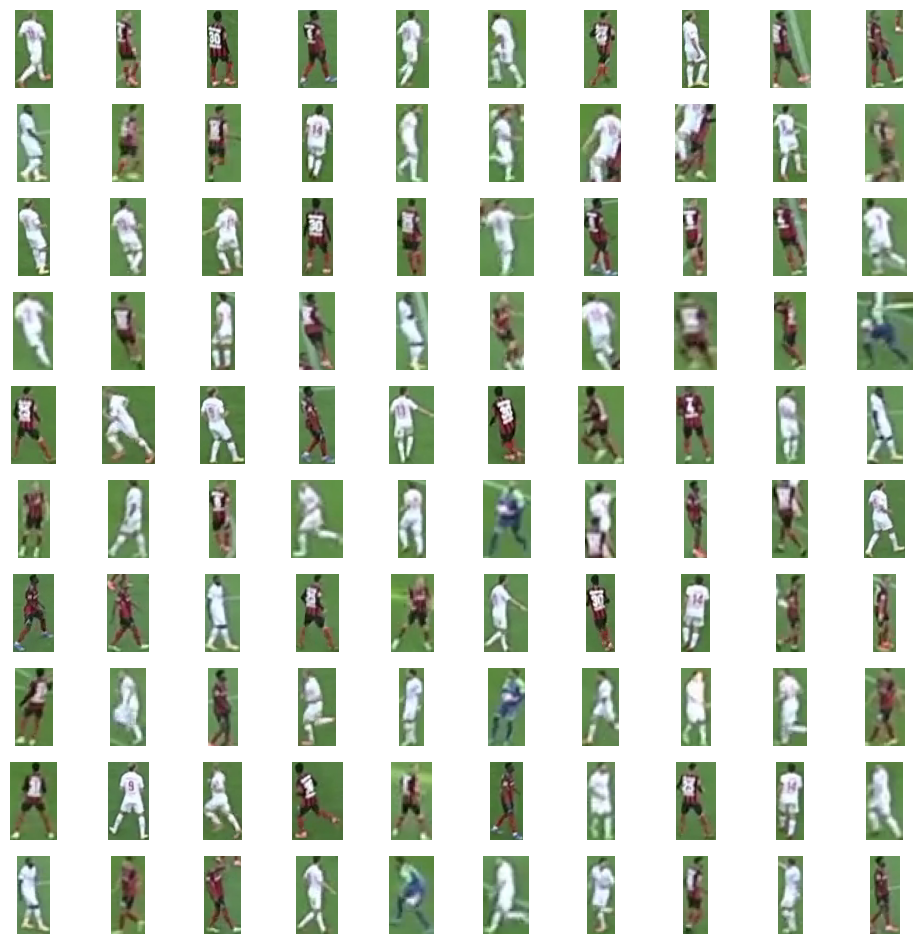

In [20]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

**Note:** Next, we'll run [SigLIP](https://huggingface.co/docs/transformers/en/model_doc/siglip) to calculate embeddings for each of the crops.

In [21]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [22]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:06,  2.42it/s]


**Note:** Using [UMAP](https://github.com/lmcinnes/umap), we project our embeddings from `(N, 768)` to `(N, 3)` and then perform a two-cluster division using [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [23]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [24]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)

**Note:** Here's an interactive visualization of our results. Click on a dot to display its associated crop.


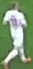
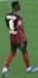
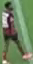
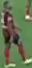
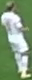
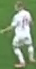
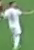
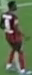
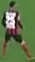
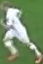
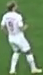
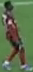
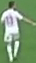
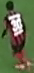
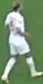
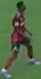
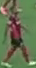
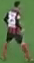
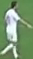
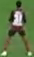
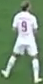
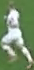
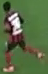
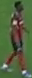
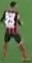
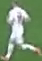
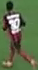
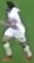
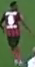
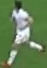
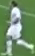
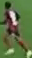
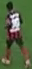
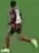
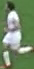
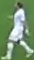
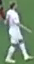
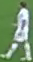
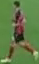
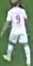
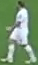
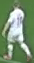
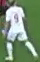
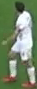
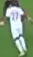
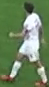
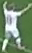
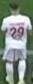
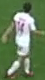
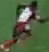
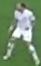
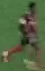
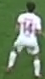
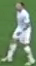
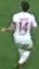
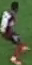
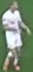
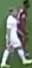
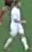
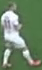
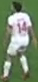
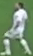
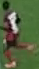
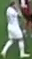
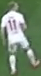
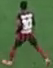
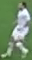
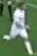
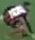

In [25]:
import plotly.graph_objects as go
import numpy as np
from typing import Dict, List
from IPython.core.display import display, HTML
from PIL import Image
import base64
from io import BytesIO


def pil_image_to_data_uri(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/png;base64,{img_str}"


def display_projections(
    labels: np.ndarray,
    projections: np.ndarray,
    images: List[Image.Image],
    show_legend: bool = False,
    show_markers_with_text: bool = True
) -> None:
    image_data_uris = {f"image_{i}": pil_image_to_data_uri(image) for i, image in enumerate(images)}
    image_ids = np.array([f"image_{i}" for i in range(len(images))])

    unique_labels = np.unique(labels)
    traces = []
    for unique_label in unique_labels:
        mask = labels == unique_label
        customdata_masked = image_ids[mask]
        trace = go.Scatter3d(
            x=projections[mask][:, 0],
            y=projections[mask][:, 1],
            z=projections[mask][:, 2],
            mode='markers+text' if show_markers_with_text else 'markers',
            text=labels[mask],
            customdata=customdata_masked,
            name=str(unique_label),
            marker=dict(size=8),
            hovertemplate="<b>class: %{text}</b><br>image ID: %{customdata}<extra></extra>"
        )
        traces.append(trace)

    # Calculate shared range for cube appearance
    all_axes = projections
    min_val = np.min(all_axes)
    max_val = np.max(all_axes)
    padding = (max_val - min_val) * 0.05
    axis_range = [min_val - padding, max_val + padding]

    fig = go.Figure(data=traces)
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X', range=axis_range),
            yaxis=dict(title='Y', range=axis_range),
            zaxis=dict(title='Z', range=axis_range),
            aspectmode='cube'  # Ensures equal scaling
        ),
        width=1000,
        height=1000,
        showlegend=show_legend
    )

    plotly_div = fig.to_html(full_html=False, include_plotlyjs=False, div_id="scatter-plot-3d")

    javascript_code = f"""
    <script>
        function displayImage(imageId) {{
            var imageElement = document.getElementById('image-display');
            var placeholderText = document.getElementById('placeholder-text');
            var imageDataURIs = {image_data_uris};
            imageElement.src = imageDataURIs[imageId];
            imageElement.style.display = 'block';
            placeholderText.style.display = 'none';
        }}

        var chartElement = document.getElementById('scatter-plot-3d');

        chartElement.on('plotly_click', function(data) {{
            var customdata = data.points[0].customdata;
            displayImage(customdata);
        }});
    </script>
    """

    html_template = f"""
    <!DOCTYPE html>
    <html>
        <head>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                #image-container {{
                    position: fixed;
                    top: 0;
                    left: 0;
                    width: 200px;
                    height: 200px;
                    padding: 5px;
                    border: 1px solid #ccc;
                    background-color: white;
                    z-index: 1000;
                    box-sizing: border-box;
                    display: flex;
                    align-items: center;
                    justify-content: center;
                    text-align: center;
                }}
                #image-display {{
                    width: 100%;
                    height: 100%;
                    object-fit: contain;
                }}
            </style>
        </head>
        <body>
            {plotly_div}
            <div id="image-container">
                <img id="image-display" src="" alt="Selected image" style="display: none;" />
                <p id="placeholder-text">Click on a data entry to display an image</p>
            </div>
            {javascript_code}
        </body>
    </html>
    """

    display(HTML(html_template))

display_projections(clusters, projections, crops)

**Note:** To simplify the use of the SigLIP, UMAP, and KMeans combo, I've packaged all these models into a [`TeamClassifier`](https://github.com/roboflow/sports/blob/06053616f1f8a8ae1fa936eb00dcdc2e4f888bb1/sports/common/team.py#L41) that you can find in the [sports](https://github.com/roboflow/sports) repository.

In [27]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/573e61_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 0it [00:00, ?it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 114.6ms
Speed: 30.2ms preprocess, 114.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 1it [00:00,  2.86it/s]


0: 384x640 20 players, 2 referees, 77.8ms
Speed: 6.1ms preprocess, 77.8ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 2it [00:01,  1.58it/s]


0: 384x640 19 players, 58.1ms
Speed: 3.9ms preprocess, 58.1ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 3it [00:01,  1.46it/s]


0: 384x640 21 players, 2 referees, 35.9ms
Speed: 4.7ms preprocess, 35.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 4it [00:02,  1.52it/s]


0: 384x640 20 players, 2 referees, 31.5ms
Speed: 3.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 5it [00:03,  1.55it/s]


0: 384x640 21 players, 2 referees, 31.0ms
Speed: 3.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 6it [00:03,  1.61it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 33.9ms
Speed: 3.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 7it [00:04,  1.61it/s]


0: 384x640 1 ball, 1 goalkeeper, 21 players, 1 referee, 31.0ms
Speed: 3.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 8it [00:04,  1.63it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 31.5ms
Speed: 3.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 9it [00:05,  1.75it/s]


0: 384x640 21 players, 31.0ms
Speed: 3.3ms preprocess, 31.0ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 10it [00:06,  1.72it/s]


0: 384x640 20 players, 1 referee, 45.8ms
Speed: 3.5ms preprocess, 45.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 11it [00:06,  1.78it/s]


0: 384x640 1 ball, 19 players, 64.5ms
Speed: 7.4ms preprocess, 64.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 12it [00:07,  1.75it/s]


0: 384x640 20 players, 1 referee, 86.4ms
Speed: 3.5ms preprocess, 86.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 13it [00:08,  1.49it/s]


0: 384x640 20 players, 2 referees, 53.1ms
Speed: 16.4ms preprocess, 53.1ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 14it [00:08,  1.43it/s]


0: 384x640 19 players, 1 referee, 89.1ms
Speed: 3.6ms preprocess, 89.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 15it [00:09,  1.29it/s]


0: 384x640 19 players, 2 referees, 32.3ms
Speed: 5.0ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 16it [00:10,  1.36it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 31.0ms
Speed: 3.6ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 17it [00:10,  1.49it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 31.0ms
Speed: 3.3ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 18it [00:11,  1.69it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 43.6ms
Speed: 4.2ms preprocess, 43.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 19it [00:11,  1.82it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 57.7ms
Speed: 11.4ms preprocess, 57.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 20it [00:12,  1.88it/s]


0: 384x640 1 ball, 18 players, 3 referees, 31.9ms
Speed: 4.7ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 21it [00:12,  2.11it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 31.2ms
Speed: 3.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 22it [00:12,  2.26it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 31.0ms
Speed: 4.1ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 23it [00:13,  2.32it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 31.0ms
Speed: 4.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 24it [00:13,  2.31it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 31.0ms
Speed: 3.7ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


collecting crops: 25it [00:14,  1.70it/s]
Embedding extraction: 17it [00:10,  1.70it/s]


**Note:** Time to assign goalkeepers to teams. We'll use a simple heuristic: calculate the average position (centroid) of the players belonging to both teams and then assign the goalkeeper to the team whose average position is closer.

In [28]:
import numpy as np
import supervision as sv

def resolve_goalkeepers_team_id(
    players: sv.Detections,
    goalkeepers: sv.Detections
) -> np.ndarray:
    goalkeepers_xy = goalkeepers.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    team_0_centroid = players_xy[players.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players.class_id == 1].mean(axis=0)
    goalkeepers_team_id = []
    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        goalkeepers_team_id.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_id)

In [29]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/573e61_0.mp4"
TARGET_VIDEO_PATH = "/content/result.mp4"

BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
   for frame in tqdm(frame_generator, total=video_info.total_frames):
      result = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
      detections = sv.Detections.from_ultralytics(result)

      ball_detections = detections[detections.class_id == BALL_ID]
      ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

      all_detections = detections[detections.class_id != BALL_ID]
      all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
      all_detections = tracker.update_with_detections(detections=all_detections)

      goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
      players_detections = all_detections[all_detections.class_id == PLAYER_ID]
      referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

      players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
      players_detections.class_id = team_classifier.predict(players_crops)

      goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
          players_detections, goalkeepers_detections)

      referees_detections.class_id -= 1

      all_detections = sv.Detections.merge([
          players_detections, goalkeepers_detections, referees_detections])

      labels = [
          f"#{tracker_id}"
          for tracker_id
          in all_detections.tracker_id
      ]

      all_detections.class_id = all_detections.class_id.astype(int)

      annotated_frame = frame.copy()
      annotated_frame = ellipse_annotator.annotate(
          scene=annotated_frame,
          detections=all_detections)
      annotated_frame = label_annotator.annotate(
          scene=annotated_frame,
          detections=all_detections,
          labels=labels)
      annotated_frame = triangle_annotator.annotate(
          scene=annotated_frame,
          detections=ball_detections)

      video_sink.write_frame(annotated_frame)

  0%|          | 0/750 [00:00<?, ?it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 68.3ms
Speed: 5.2ms preprocess, 68.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.38it/s]
  0%|          | 1/750 [00:09<1:56:16,  9.31s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 31.0ms
Speed: 3.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.65it/s]
  0%|          | 2/750 [00:09<52:05,  4.18s/it]  


0: 384x640 1 goalkeeper, 19 players, 1 referee, 58.8ms
Speed: 3.5ms preprocess, 58.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.08it/s]
  0%|          | 3/750 [00:10<31:16,  2.51s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 30.7ms
Speed: 4.9ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.12it/s]
  1%|          | 4/750 [00:11<22:09,  1.78s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 25.4ms
Speed: 3.6ms preprocess, 25.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.85it/s]
  1%|          | 5/750 [00:11<17:34,  1.42s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 73.3ms
Speed: 3.5ms preprocess, 73.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.83it/s]
  1%|          | 6/750 [00:12<14:22,  1.16s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 116.2ms
Speed: 14.6ms preprocess, 116.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.18it/s]
  1%|          | 7/750 [00:13<13:23,  1.08s/it]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 58.4ms
Speed: 3.7ms preprocess, 58.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.19it/s]
  1%|          | 8/750 [00:13<11:12,  1.10it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 34.7ms
Speed: 4.1ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
  1%|          | 9/750 [00:14<09:37,  1.28it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 44.0ms
Speed: 3.5ms preprocess, 44.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.67it/s]
  1%|▏         | 10/750 [00:15<09:20,  1.32it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 70.4ms
Speed: 6.4ms preprocess, 70.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.76it/s]
  1%|▏         | 11/750 [00:15<08:54,  1.38it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 44.7ms
Speed: 3.6ms preprocess, 44.7ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.19it/s]
  2%|▏         | 12/750 [00:16<08:20,  1.48it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 67.5ms
Speed: 3.6ms preprocess, 67.5ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.06it/s]
  2%|▏         | 13/750 [00:17<08:04,  1.52it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 31.8ms
Speed: 3.5ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
  2%|▏         | 14/750 [00:17<07:27,  1.65it/s]


0: 384x640 2 goalkeepers, 20 players, 2 referees, 30.2ms
Speed: 3.5ms preprocess, 30.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
  2%|▏         | 15/750 [00:17<06:40,  1.83it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.7ms
Speed: 3.8ms preprocess, 21.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
  2%|▏         | 16/750 [00:18<06:01,  2.03it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
  2%|▏         | 17/750 [00:18<05:32,  2.20it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.2ms
Speed: 3.4ms preprocess, 20.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
  2%|▏         | 18/750 [00:18<05:11,  2.35it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.1ms
Speed: 3.5ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
  3%|▎         | 19/750 [00:19<04:57,  2.46it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 20.5ms
Speed: 3.5ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.04it/s]
  3%|▎         | 20/750 [00:19<04:42,  2.59it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
  3%|▎         | 21/750 [00:20<04:36,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.7ms
Speed: 3.4ms preprocess, 20.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
  3%|▎         | 22/750 [00:20<04:33,  2.66it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.8ms
Speed: 3.5ms preprocess, 20.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
  3%|▎         | 23/750 [00:20<04:31,  2.68it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.0ms
Speed: 3.3ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
  3%|▎         | 24/750 [00:21<04:29,  2.69it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 19.0ms
Speed: 3.4ms preprocess, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
  3%|▎         | 25/750 [00:21<04:31,  2.67it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.4ms
Speed: 3.7ms preprocess, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
  3%|▎         | 26/750 [00:21<04:28,  2.70it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.5ms
Speed: 3.6ms preprocess, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
  4%|▎         | 27/750 [00:22<04:28,  2.70it/s]


0: 384x640 21 players, 2 referees, 38.1ms
Speed: 3.3ms preprocess, 38.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
  4%|▎         | 28/750 [00:22<04:31,  2.66it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.0ms
Speed: 3.3ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
  4%|▍         | 29/750 [00:23<04:30,  2.67it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.0ms
Speed: 3.5ms preprocess, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
  4%|▍         | 30/750 [00:23<04:28,  2.68it/s]


0: 384x640 20 players, 2 referees, 17.9ms
Speed: 3.5ms preprocess, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
  4%|▍         | 31/750 [00:23<04:25,  2.71it/s]


0: 384x640 22 players, 2 referees, 21.2ms
Speed: 3.4ms preprocess, 21.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
  4%|▍         | 32/750 [00:24<04:27,  2.68it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 20.4ms
Speed: 3.6ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
  4%|▍         | 33/750 [00:24<04:22,  2.73it/s]


0: 384x640 20 players, 2 referees, 21.2ms
Speed: 3.7ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
  5%|▍         | 34/750 [00:24<04:23,  2.72it/s]


0: 384x640 20 players, 2 referees, 18.7ms
Speed: 3.5ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
  5%|▍         | 35/750 [00:25<04:24,  2.71it/s]


0: 384x640 20 players, 2 referees, 18.1ms
Speed: 3.5ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
  5%|▍         | 36/750 [00:25<04:24,  2.70it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 20.3ms
Speed: 3.6ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
  5%|▍         | 37/750 [00:25<04:19,  2.75it/s]


0: 384x640 20 players, 2 referees, 29.6ms
Speed: 3.6ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.36it/s]
  5%|▌         | 38/750 [00:26<04:29,  2.64it/s]


0: 384x640 21 players, 2 referees, 20.3ms
Speed: 4.2ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
  5%|▌         | 39/750 [00:26<04:30,  2.63it/s]


0: 384x640 20 players, 1 referee, 20.9ms
Speed: 3.4ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
  5%|▌         | 40/750 [00:27<04:39,  2.54it/s]


0: 384x640 20 players, 1 referee, 29.0ms
Speed: 3.6ms preprocess, 29.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.34it/s]
  5%|▌         | 41/750 [00:27<04:48,  2.46it/s]


0: 384x640 21 players, 2 referees, 28.4ms
Speed: 3.5ms preprocess, 28.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.29it/s]
  6%|▌         | 42/750 [00:28<05:03,  2.33it/s]


0: 384x640 21 players, 2 referees, 28.4ms
Speed: 3.7ms preprocess, 28.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.16it/s]
  6%|▌         | 43/750 [00:28<05:19,  2.21it/s]


0: 384x640 21 players, 1 referee, 37.1ms
Speed: 3.5ms preprocess, 37.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.21it/s]
  6%|▌         | 44/750 [00:29<05:23,  2.18it/s]


0: 384x640 21 players, 2 referees, 31.3ms
Speed: 3.8ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.06it/s]
  6%|▌         | 45/750 [00:29<05:02,  2.33it/s]


0: 384x640 20 players, 2 referees, 22.5ms
Speed: 3.6ms preprocess, 22.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
  6%|▌         | 46/750 [00:29<04:53,  2.40it/s]


0: 384x640 20 players, 2 referees, 19.8ms
Speed: 6.2ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
  6%|▋         | 47/750 [00:30<04:48,  2.44it/s]


0: 384x640 22 players, 2 referees, 23.1ms
Speed: 3.5ms preprocess, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
  6%|▋         | 48/750 [00:30<04:43,  2.47it/s]


0: 384x640 21 players, 2 referees, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
  7%|▋         | 49/750 [00:30<04:37,  2.52it/s]


0: 384x640 19 players, 1 referee, 24.0ms
Speed: 3.5ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
  7%|▋         | 50/750 [00:31<04:28,  2.61it/s]


0: 384x640 20 players, 1 referee, 18.3ms
Speed: 3.5ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
  7%|▋         | 51/750 [00:31<04:25,  2.63it/s]


0: 384x640 21 players, 2 referees, 17.6ms
Speed: 3.5ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
  7%|▋         | 52/750 [00:32<04:24,  2.64it/s]


0: 384x640 21 players, 2 referees, 21.5ms
Speed: 3.5ms preprocess, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
  7%|▋         | 53/750 [00:32<04:23,  2.65it/s]


0: 384x640 21 players, 2 referees, 19.5ms
Speed: 4.3ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
  7%|▋         | 54/750 [00:32<04:25,  2.62it/s]


0: 384x640 21 players, 1 referee, 24.2ms
Speed: 3.3ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
  7%|▋         | 55/750 [00:33<04:25,  2.62it/s]


0: 384x640 20 players, 2 referees, 17.7ms
Speed: 3.4ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
  7%|▋         | 56/750 [00:33<04:25,  2.61it/s]


0: 384x640 19 players, 2 referees, 21.4ms
Speed: 3.6ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
  8%|▊         | 57/750 [00:33<04:21,  2.65it/s]


0: 384x640 20 players, 2 referees, 23.9ms
Speed: 3.6ms preprocess, 23.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
  8%|▊         | 58/750 [00:34<04:20,  2.65it/s]


0: 384x640 20 players, 1 referee, 17.9ms
Speed: 3.4ms preprocess, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
  8%|▊         | 59/750 [00:34<04:18,  2.67it/s]


0: 384x640 19 players, 1 referee, 23.0ms
Speed: 3.6ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
  8%|▊         | 60/750 [00:35<04:18,  2.67it/s]


0: 384x640 19 players, 19.0ms
Speed: 3.5ms preprocess, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
  8%|▊         | 61/750 [00:35<04:14,  2.70it/s]


0: 384x640 18 players, 2 referees, 22.6ms
Speed: 3.6ms preprocess, 22.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
  8%|▊         | 62/750 [00:35<04:14,  2.71it/s]


0: 384x640 21 players, 3 referees, 19.5ms
Speed: 3.5ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
  8%|▊         | 63/750 [00:36<04:13,  2.71it/s]


0: 384x640 21 players, 3 referees, 18.1ms
Speed: 3.5ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
  9%|▊         | 64/750 [00:36<04:13,  2.70it/s]


0: 384x640 22 players, 2 referees, 17.5ms
Speed: 3.7ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
  9%|▊         | 65/750 [00:36<04:15,  2.68it/s]


0: 384x640 22 players, 2 referees, 22.3ms
Speed: 3.6ms preprocess, 22.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
  9%|▉         | 66/750 [00:37<04:18,  2.65it/s]


0: 384x640 21 players, 1 referee, 17.1ms
Speed: 3.4ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
  9%|▉         | 67/750 [00:37<04:18,  2.64it/s]


0: 384x640 21 players, 1 referee, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
  9%|▉         | 68/750 [00:38<04:19,  2.63it/s]


0: 384x640 22 players, 1 referee, 18.9ms
Speed: 3.5ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
  9%|▉         | 69/750 [00:38<04:20,  2.62it/s]


0: 384x640 22 players, 1 referee, 19.7ms
Speed: 3.5ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
  9%|▉         | 70/750 [00:38<04:23,  2.59it/s]


0: 384x640 21 players, 1 referee, 18.9ms
Speed: 3.8ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
  9%|▉         | 71/750 [00:39<04:22,  2.58it/s]


0: 384x640 21 players, 1 referee, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 10%|▉         | 72/750 [00:39<04:27,  2.54it/s]


0: 384x640 22 players, 1 referee, 23.8ms
Speed: 3.5ms preprocess, 23.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.08it/s]
 10%|▉         | 73/750 [00:40<04:41,  2.41it/s]


0: 384x640 22 players, 2 referees, 33.7ms
Speed: 3.6ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.20it/s]
 10%|▉         | 74/750 [00:40<04:52,  2.31it/s]


0: 384x640 21 players, 2 referees, 28.3ms
Speed: 4.4ms preprocess, 28.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.21it/s]
 10%|█         | 75/750 [00:41<04:58,  2.26it/s]


0: 384x640 21 players, 2 referees, 33.2ms
Speed: 3.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.14it/s]
 10%|█         | 76/750 [00:41<05:07,  2.19it/s]


0: 384x640 21 players, 2 referees, 19.7ms
Speed: 3.4ms preprocess, 19.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 10%|█         | 77/750 [00:41<04:53,  2.29it/s]


0: 384x640 21 players, 2 referees, 19.6ms
Speed: 3.7ms preprocess, 19.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 10%|█         | 78/750 [00:42<04:43,  2.37it/s]


0: 384x640 20 players, 2 referees, 18.7ms
Speed: 3.6ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 11%|█         | 79/750 [00:42<04:34,  2.45it/s]


0: 384x640 21 players, 2 referees, 20.3ms
Speed: 3.6ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
 11%|█         | 80/750 [00:43<04:33,  2.45it/s]


0: 384x640 21 players, 2 referees, 18.8ms
Speed: 5.4ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 11%|█         | 81/750 [00:43<04:29,  2.48it/s]


0: 384x640 20 players, 2 referees, 24.3ms
Speed: 3.3ms preprocess, 24.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 11%|█         | 82/750 [00:43<04:24,  2.52it/s]


0: 384x640 20 players, 2 referees, 24.6ms
Speed: 3.5ms preprocess, 24.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 11%|█         | 83/750 [00:44<04:22,  2.54it/s]


0: 384x640 20 players, 2 referees, 21.3ms
Speed: 3.5ms preprocess, 21.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 11%|█         | 84/750 [00:44<04:21,  2.55it/s]


0: 384x640 21 players, 2 referees, 18.8ms
Speed: 3.4ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 11%|█▏        | 85/750 [00:45<04:20,  2.55it/s]


0: 384x640 20 players, 3 referees, 23.5ms
Speed: 3.5ms preprocess, 23.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.30it/s]
 11%|█▏        | 86/750 [00:45<04:21,  2.54it/s]


0: 384x640 20 players, 3 referees, 17.6ms
Speed: 3.4ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 12%|█▏        | 87/750 [00:45<04:18,  2.56it/s]


0: 384x640 21 players, 2 referees, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 12%|█▏        | 88/750 [00:46<04:20,  2.55it/s]


0: 384x640 21 players, 2 referees, 19.1ms
Speed: 3.7ms preprocess, 19.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 12%|█▏        | 89/750 [00:46<04:18,  2.56it/s]


0: 384x640 21 players, 2 referees, 23.0ms
Speed: 3.4ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 12%|█▏        | 90/750 [00:47<04:16,  2.57it/s]


0: 384x640 21 players, 2 referees, 21.9ms
Speed: 3.4ms preprocess, 21.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 12%|█▏        | 91/750 [00:47<04:15,  2.58it/s]


0: 384x640 21 players, 2 referees, 24.0ms
Speed: 3.6ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 12%|█▏        | 92/750 [00:47<04:15,  2.57it/s]


0: 384x640 19 players, 2 referees, 23.2ms
Speed: 3.5ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 12%|█▏        | 93/750 [00:48<04:09,  2.63it/s]


0: 384x640 20 players, 2 referees, 21.1ms
Speed: 5.7ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 13%|█▎        | 94/750 [00:48<04:11,  2.61it/s]


0: 384x640 20 players, 1 referee, 18.0ms
Speed: 3.5ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 13%|█▎        | 95/750 [00:48<04:10,  2.62it/s]


0: 384x640 21 players, 2 referees, 23.7ms
Speed: 3.6ms preprocess, 23.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 13%|█▎        | 96/750 [00:49<04:14,  2.57it/s]


0: 384x640 20 players, 2 referees, 16.6ms
Speed: 3.4ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 13%|█▎        | 97/750 [00:49<04:12,  2.59it/s]


0: 384x640 20 players, 2 referees, 21.4ms
Speed: 3.6ms preprocess, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 13%|█▎        | 98/750 [00:50<04:11,  2.59it/s]


0: 384x640 18 players, 2 referees, 19.1ms
Speed: 5.1ms preprocess, 19.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 13%|█▎        | 99/750 [00:50<04:05,  2.65it/s]


0: 384x640 19 players, 2 referees, 19.7ms
Speed: 3.7ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 13%|█▎        | 100/750 [00:50<04:01,  2.69it/s]


0: 384x640 20 players, 2 referees, 23.4ms
Speed: 3.4ms preprocess, 23.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 13%|█▎        | 101/750 [00:51<04:03,  2.66it/s]


0: 384x640 20 players, 2 referees, 23.0ms
Speed: 7.2ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 14%|█▎        | 102/750 [00:51<04:10,  2.59it/s]


0: 384x640 20 players, 2 referees, 34.4ms
Speed: 3.9ms preprocess, 34.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.37it/s]
 14%|█▎        | 103/750 [00:52<04:24,  2.44it/s]


0: 384x640 20 players, 2 referees, 27.1ms
Speed: 3.8ms preprocess, 27.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
 14%|█▍        | 104/750 [00:52<04:34,  2.35it/s]


0: 384x640 20 players, 2 referees, 24.7ms
Speed: 3.8ms preprocess, 24.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
 14%|█▍        | 105/750 [00:53<04:38,  2.31it/s]


0: 384x640 21 players, 2 referees, 39.8ms
Speed: 3.8ms preprocess, 39.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.24it/s]
 14%|█▍        | 106/750 [00:53<04:43,  2.27it/s]


0: 384x640 21 players, 2 referees, 37.8ms
Speed: 5.3ms preprocess, 37.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.18it/s]
 14%|█▍        | 107/750 [00:53<04:45,  2.25it/s]


0: 384x640 21 players, 2 referees, 16.9ms
Speed: 3.4ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 14%|█▍        | 108/750 [00:54<04:33,  2.34it/s]


0: 384x640 21 players, 2 referees, 17.6ms
Speed: 3.5ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
 15%|█▍        | 109/750 [00:54<04:26,  2.41it/s]


0: 384x640 21 players, 1 referee, 23.7ms
Speed: 5.7ms preprocess, 23.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 15%|█▍        | 110/750 [00:55<04:19,  2.46it/s]


0: 384x640 21 players, 1 referee, 22.3ms
Speed: 3.4ms preprocess, 22.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 15%|█▍        | 111/750 [00:55<04:14,  2.51it/s]


0: 384x640 20 players, 1 referee, 19.1ms
Speed: 5.4ms preprocess, 19.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 15%|█▍        | 112/750 [00:55<04:12,  2.53it/s]


0: 384x640 20 players, 2 referees, 17.4ms
Speed: 2.5ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 15%|█▌        | 113/750 [00:56<04:18,  2.47it/s]


0: 384x640 20 players, 2 referees, 22.6ms
Speed: 6.2ms preprocess, 22.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 15%|█▌        | 114/750 [00:56<04:15,  2.48it/s]


0: 384x640 20 players, 2 referees, 31.9ms
Speed: 4.0ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 15%|█▌        | 115/750 [00:57<04:12,  2.51it/s]


0: 384x640 20 players, 2 referees, 21.1ms
Speed: 3.8ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 15%|█▌        | 116/750 [00:57<04:08,  2.55it/s]


0: 384x640 20 players, 1 referee, 17.0ms
Speed: 3.5ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 16%|█▌        | 117/750 [00:57<04:07,  2.56it/s]


0: 384x640 20 players, 1 referee, 25.1ms
Speed: 3.3ms preprocess, 25.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 16%|█▌        | 118/750 [00:58<04:05,  2.58it/s]


0: 384x640 22 players, 1 referee, 23.1ms
Speed: 3.5ms preprocess, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 16%|█▌        | 119/750 [00:58<04:04,  2.58it/s]


0: 384x640 21 players, 1 referee, 16.8ms
Speed: 3.4ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 16%|█▌        | 120/750 [00:58<04:03,  2.59it/s]


0: 384x640 20 players, 2 referees, 20.4ms
Speed: 3.6ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 16%|█▌        | 121/750 [00:59<04:01,  2.60it/s]


0: 384x640 21 players, 2 referees, 18.2ms
Speed: 3.5ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 16%|█▋        | 122/750 [00:59<04:02,  2.59it/s]


0: 384x640 21 players, 2 referees, 22.6ms
Speed: 3.5ms preprocess, 22.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 16%|█▋        | 123/750 [01:00<04:04,  2.56it/s]


0: 384x640 21 players, 2 referees, 17.2ms
Speed: 3.6ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 17%|█▋        | 124/750 [01:00<04:04,  2.56it/s]


0: 384x640 21 players, 2 referees, 20.3ms
Speed: 4.3ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 17%|█▋        | 125/750 [01:00<04:03,  2.57it/s]


0: 384x640 20 players, 2 referees, 24.5ms
Speed: 3.5ms preprocess, 24.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 17%|█▋        | 126/750 [01:01<04:00,  2.60it/s]


0: 384x640 1 ball, 21 players, 3 referees, 18.6ms
Speed: 3.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 17%|█▋        | 127/750 [01:01<04:01,  2.58it/s]


0: 384x640 1 ball, 22 players, 3 referees, 18.7ms
Speed: 3.4ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 17%|█▋        | 128/750 [01:02<03:59,  2.59it/s]


0: 384x640 22 players, 3 referees, 22.4ms
Speed: 3.6ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 17%|█▋        | 129/750 [01:02<03:58,  2.61it/s]


0: 384x640 22 players, 2 referees, 21.8ms
Speed: 3.5ms preprocess, 21.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.11it/s]
 17%|█▋        | 130/750 [01:02<04:07,  2.51it/s]


0: 384x640 21 players, 2 referees, 24.1ms
Speed: 3.3ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 17%|█▋        | 131/750 [01:03<04:06,  2.51it/s]


0: 384x640 22 players, 2 referees, 20.9ms
Speed: 3.3ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 18%|█▊        | 132/750 [01:03<04:03,  2.54it/s]


0: 384x640 1 ball, 21 players, 1 referee, 20.9ms
Speed: 3.8ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 18%|█▊        | 133/750 [01:04<04:07,  2.49it/s]


0: 384x640 20 players, 2 referees, 24.6ms
Speed: 11.1ms preprocess, 24.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.31it/s]
 18%|█▊        | 134/750 [01:04<04:19,  2.37it/s]


0: 384x640 20 players, 2 referees, 22.5ms
Speed: 3.5ms preprocess, 22.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.32it/s]
 18%|█▊        | 135/750 [01:05<04:28,  2.29it/s]


0: 384x640 21 players, 2 referees, 30.6ms
Speed: 3.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.30it/s]
 18%|█▊        | 136/750 [01:05<04:30,  2.27it/s]


0: 384x640 21 players, 2 referees, 29.3ms
Speed: 6.1ms preprocess, 29.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.28it/s]
 18%|█▊        | 137/750 [01:05<04:36,  2.22it/s]


0: 384x640 21 players, 2 referees, 44.2ms
Speed: 3.4ms preprocess, 44.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.21it/s]
 18%|█▊        | 138/750 [01:06<04:34,  2.23it/s]


0: 384x640 19 players, 2 referees, 22.0ms
Speed: 3.4ms preprocess, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 19%|█▊        | 139/750 [01:06<04:16,  2.39it/s]


0: 384x640 19 players, 2 referees, 21.6ms
Speed: 3.4ms preprocess, 21.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 19%|█▊        | 140/750 [01:07<04:06,  2.47it/s]


0: 384x640 19 players, 2 referees, 26.6ms
Speed: 3.3ms preprocess, 26.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 19%|█▉        | 141/750 [01:07<03:58,  2.56it/s]


0: 384x640 19 players, 2 referees, 18.8ms
Speed: 3.5ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 19%|█▉        | 142/750 [01:07<03:53,  2.61it/s]


0: 384x640 19 players, 2 referees, 23.2ms
Speed: 4.2ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 19%|█▉        | 143/750 [01:08<03:50,  2.63it/s]


0: 384x640 20 players, 2 referees, 19.6ms
Speed: 7.7ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 19%|█▉        | 144/750 [01:08<03:49,  2.64it/s]


0: 384x640 18 players, 2 referees, 21.4ms
Speed: 3.5ms preprocess, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.95it/s]
 19%|█▉        | 145/750 [01:08<03:43,  2.71it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.1ms
Speed: 3.5ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.93it/s]
 19%|█▉        | 146/750 [01:09<03:41,  2.73it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.7ms
Speed: 3.7ms preprocess, 22.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.98it/s]
 20%|█▉        | 147/750 [01:09<03:38,  2.76it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 25.0ms
Speed: 3.4ms preprocess, 25.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 20%|█▉        | 148/750 [01:10<03:38,  2.76it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.0ms
Speed: 3.3ms preprocess, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 20%|█▉        | 149/750 [01:10<03:36,  2.78it/s]


0: 384x640 20 players, 2 referees, 19.7ms
Speed: 3.5ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 20%|██        | 150/750 [01:10<03:38,  2.74it/s]


0: 384x640 21 players, 2 referees, 21.4ms
Speed: 3.4ms preprocess, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 20%|██        | 151/750 [01:11<03:41,  2.70it/s]


0: 384x640 21 players, 2 referees, 17.2ms
Speed: 3.4ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 20%|██        | 152/750 [01:11<03:43,  2.67it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.9ms
Speed: 3.6ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 20%|██        | 153/750 [01:11<03:42,  2.68it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.4ms
Speed: 3.5ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 21%|██        | 154/750 [01:12<03:44,  2.65it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 36.9ms
Speed: 3.3ms preprocess, 36.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 21%|██        | 155/750 [01:12<03:46,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 23.5ms
Speed: 3.4ms preprocess, 23.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 21%|██        | 156/750 [01:13<03:46,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 21%|██        | 157/750 [01:13<03:45,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 17.6ms
Speed: 4.2ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 21%|██        | 158/750 [01:13<03:45,  2.62it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.0ms
Speed: 3.9ms preprocess, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 21%|██        | 159/750 [01:14<03:43,  2.64it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 23.7ms
Speed: 3.4ms preprocess, 23.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 21%|██▏       | 160/750 [01:14<03:44,  2.63it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 1 referee, 16.9ms
Speed: 3.0ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 21%|██▏       | 161/750 [01:14<03:42,  2.64it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 23.2ms
Speed: 3.3ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 22%|██▏       | 162/750 [01:15<03:42,  2.65it/s]


0: 384x640 1 goalkeeper, 21 players, 1 referee, 17.0ms
Speed: 3.6ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 22%|██▏       | 163/750 [01:15<03:42,  2.63it/s]


0: 384x640 1 goalkeeper, 21 players, 1 referee, 22.9ms
Speed: 3.7ms preprocess, 22.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 22%|██▏       | 164/750 [01:16<03:42,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 21.0ms
Speed: 3.5ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 22%|██▏       | 165/750 [01:16<03:50,  2.54it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 26.9ms
Speed: 3.6ms preprocess, 26.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
 22%|██▏       | 166/750 [01:16<04:00,  2.43it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 26.4ms
Speed: 3.5ms preprocess, 26.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
 22%|██▏       | 167/750 [01:17<04:09,  2.34it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 22.1ms
Speed: 6.4ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.20it/s]
 22%|██▏       | 168/750 [01:17<04:15,  2.28it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 35.5ms
Speed: 3.6ms preprocess, 35.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
 23%|██▎       | 169/750 [01:18<04:17,  2.26it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 33.4ms
Speed: 3.6ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
 23%|██▎       | 170/750 [01:18<04:13,  2.28it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 16.5ms
Speed: 3.0ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 23%|██▎       | 171/750 [01:19<04:03,  2.38it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.3ms
Speed: 4.0ms preprocess, 22.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.93it/s]
 23%|██▎       | 172/750 [01:19<03:52,  2.48it/s]


0: 384x640 1 ball, 18 players, 2 referees, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 23%|██▎       | 173/750 [01:19<03:45,  2.56it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 19.5ms
Speed: 3.9ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.08it/s]
 23%|██▎       | 174/750 [01:20<03:38,  2.64it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 17.9ms
Speed: 3.3ms preprocess, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 23%|██▎       | 175/750 [01:20<03:35,  2.67it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 17.3ms
Speed: 3.1ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 23%|██▎       | 176/750 [01:20<03:33,  2.69it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 24%|██▎       | 177/750 [01:21<03:31,  2.71it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.5ms
Speed: 10.3ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.03it/s]
 24%|██▎       | 178/750 [01:21<03:27,  2.75it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 35.5ms
Speed: 3.6ms preprocess, 35.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.94it/s]
 24%|██▍       | 179/750 [01:22<03:28,  2.74it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.4ms
Speed: 10.0ms preprocess, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.96it/s]
 24%|██▍       | 180/750 [01:22<03:26,  2.77it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 17.1ms
Speed: 3.0ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 24%|██▍       | 181/750 [01:22<03:47,  2.50it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 63.1ms
Speed: 9.7ms preprocess, 63.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.74it/s]
 24%|██▍       | 182/750 [01:23<04:31,  2.09it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 79.6ms
Speed: 8.4ms preprocess, 79.6ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.71it/s]
 24%|██▍       | 183/750 [01:24<05:34,  1.69it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 98.7ms
Speed: 3.4ms preprocess, 98.7ms inference, 12.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.59it/s]
 25%|██▍       | 184/750 [01:25<06:04,  1.55it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 100.6ms
Speed: 9.0ms preprocess, 100.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
 25%|██▍       | 185/750 [01:25<06:11,  1.52it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 51.5ms
Speed: 18.1ms preprocess, 51.5ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.57it/s]
 25%|██▍       | 186/750 [01:26<06:01,  1.56it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.8ms
Speed: 3.5ms preprocess, 22.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 25%|██▍       | 187/750 [01:26<05:13,  1.79it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 18.2ms
Speed: 4.2ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 25%|██▌       | 188/750 [01:27<04:40,  2.00it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.6ms
Speed: 3.5ms preprocess, 21.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 25%|██▌       | 189/750 [01:27<04:16,  2.18it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 24.4ms
Speed: 3.5ms preprocess, 24.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.02it/s]
 25%|██▌       | 190/750 [01:27<03:59,  2.34it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.0ms
Speed: 3.6ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 25%|██▌       | 191/750 [01:28<03:50,  2.42it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 26%|██▌       | 192/750 [01:28<03:47,  2.45it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 30.3ms
Speed: 3.8ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 26%|██▌       | 193/750 [01:29<03:52,  2.39it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 30.3ms
Speed: 3.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 26%|██▌       | 194/750 [01:29<03:56,  2.35it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 30.4ms
Speed: 3.3ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 26%|██▌       | 195/750 [01:30<04:04,  2.27it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.1ms
Speed: 3.5ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 26%|██▌       | 196/750 [01:30<04:01,  2.29it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 35.2ms
Speed: 4.0ms preprocess, 35.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 26%|██▋       | 197/750 [01:30<04:04,  2.27it/s]


0: 384x640 19 players, 2 referees, 19.9ms
Speed: 3.5ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 26%|██▋       | 198/750 [01:31<03:52,  2.38it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 17.1ms
Speed: 2.6ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 27%|██▋       | 199/750 [01:31<03:44,  2.45it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 23.2ms
Speed: 3.4ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 27%|██▋       | 200/750 [01:32<03:40,  2.50it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 16.8ms
Speed: 2.9ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 27%|██▋       | 201/750 [01:32<03:38,  2.51it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.7ms
Speed: 3.7ms preprocess, 20.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 27%|██▋       | 202/750 [01:32<03:35,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 18.0ms
Speed: 3.7ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 27%|██▋       | 203/750 [01:33<03:30,  2.60it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 33.1ms
Speed: 3.6ms preprocess, 33.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 27%|██▋       | 204/750 [01:33<03:31,  2.58it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 22.3ms
Speed: 3.4ms preprocess, 22.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 27%|██▋       | 205/750 [01:33<03:27,  2.63it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 18.3ms
Speed: 3.5ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.05it/s]
 27%|██▋       | 206/750 [01:34<03:26,  2.63it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.2ms
Speed: 6.2ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 28%|██▊       | 207/750 [01:34<03:23,  2.67it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.97it/s]
 28%|██▊       | 208/750 [01:35<03:19,  2.71it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.4ms
Speed: 3.9ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 28%|██▊       | 209/750 [01:35<03:21,  2.68it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 20.1ms
Speed: 3.5ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 28%|██▊       | 210/750 [01:35<03:20,  2.69it/s]


0: 384x640 1 ball, 1 goalkeeper, 21 players, 1 referee, 25.9ms
Speed: 3.4ms preprocess, 25.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 28%|██▊       | 211/750 [01:36<03:21,  2.67it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 23.8ms
Speed: 3.5ms preprocess, 23.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 28%|██▊       | 212/750 [01:36<03:22,  2.66it/s]


0: 384x640 21 players, 1 referee, 20.9ms
Speed: 4.0ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 28%|██▊       | 213/750 [01:36<03:24,  2.63it/s]


0: 384x640 1 goalkeeper, 21 players, 1 referee, 23.8ms
Speed: 3.6ms preprocess, 23.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 29%|██▊       | 214/750 [01:37<03:24,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.5ms
Speed: 3.6ms preprocess, 24.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 29%|██▊       | 215/750 [01:37<03:23,  2.63it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 17.6ms
Speed: 3.4ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.94it/s]
 29%|██▉       | 216/750 [01:38<03:20,  2.66it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 21.9ms
Speed: 3.3ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 29%|██▉       | 217/750 [01:38<03:19,  2.68it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 24.0ms
Speed: 4.4ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 29%|██▉       | 218/750 [01:38<03:16,  2.71it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 18.1ms
Speed: 6.2ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 29%|██▉       | 219/750 [01:39<03:16,  2.71it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.4ms
Speed: 3.6ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 29%|██▉       | 220/750 [01:39<03:15,  2.72it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.1ms
Speed: 3.6ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 29%|██▉       | 221/750 [01:39<03:12,  2.74it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 18.2ms
Speed: 3.6ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 30%|██▉       | 222/750 [01:40<03:18,  2.67it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.6ms
Speed: 6.1ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 30%|██▉       | 223/750 [01:40<03:16,  2.69it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 18.6ms
Speed: 8.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 30%|██▉       | 224/750 [01:41<03:18,  2.65it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 31.5ms
Speed: 3.3ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 30%|███       | 225/750 [01:41<03:26,  2.54it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 34.0ms
Speed: 3.6ms preprocess, 34.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.24it/s]
 30%|███       | 226/750 [01:41<03:37,  2.41it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 26.1ms
Speed: 4.5ms preprocess, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 30%|███       | 227/750 [01:42<03:40,  2.38it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 30.4ms
Speed: 3.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.26it/s]
 30%|███       | 228/750 [01:42<03:46,  2.30it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 33.0ms
Speed: 3.3ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 31%|███       | 229/750 [01:43<03:44,  2.32it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 23.2ms
Speed: 3.5ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.97it/s]
 31%|███       | 230/750 [01:43<03:33,  2.44it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.8ms
Speed: 2.6ms preprocess, 22.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 31%|███       | 231/750 [01:43<03:28,  2.49it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.4ms
Speed: 3.4ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 31%|███       | 232/750 [01:44<03:22,  2.56it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.0ms
Speed: 2.4ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 31%|███       | 233/750 [01:44<03:19,  2.59it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.2ms
Speed: 3.5ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 31%|███       | 234/750 [01:45<03:16,  2.63it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.2ms
Speed: 3.7ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 31%|███▏      | 235/750 [01:45<03:12,  2.68it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 16.6ms
Speed: 2.6ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.03it/s]
 31%|███▏      | 236/750 [01:45<03:09,  2.71it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 19.6ms
Speed: 3.4ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
 32%|███▏      | 237/750 [01:46<03:07,  2.73it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 19.9ms
Speed: 5.5ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 32%|███▏      | 238/750 [01:46<03:07,  2.73it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.7ms
Speed: 3.3ms preprocess, 22.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 32%|███▏      | 239/750 [01:46<03:06,  2.74it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 17.6ms
Speed: 3.2ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 32%|███▏      | 240/750 [01:47<03:05,  2.76it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 21.0ms
Speed: 6.2ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 32%|███▏      | 241/750 [01:47<03:05,  2.74it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 24.1ms
Speed: 3.4ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.93it/s]
 32%|███▏      | 242/750 [01:47<03:04,  2.75it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.96it/s]
 32%|███▏      | 243/750 [01:48<03:03,  2.76it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 27.6ms
Speed: 4.1ms preprocess, 27.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 33%|███▎      | 244/750 [01:48<03:03,  2.75it/s]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 24.3ms
Speed: 3.5ms preprocess, 24.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 33%|███▎      | 245/750 [01:49<03:03,  2.75it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 27.2ms
Speed: 3.7ms preprocess, 27.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 33%|███▎      | 246/750 [01:49<03:07,  2.69it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 23.2ms
Speed: 4.1ms preprocess, 23.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 33%|███▎      | 247/750 [01:49<03:10,  2.64it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 3.7ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 33%|███▎      | 248/750 [01:50<03:12,  2.60it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 18.1ms
Speed: 3.5ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 33%|███▎      | 249/750 [01:50<03:12,  2.60it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 24.2ms
Speed: 3.7ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 33%|███▎      | 250/750 [01:51<03:10,  2.63it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.3ms
Speed: 5.8ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 33%|███▎      | 251/750 [01:51<03:08,  2.65it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.8ms
Speed: 3.4ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 34%|███▎      | 252/750 [01:51<03:05,  2.69it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.0ms
Speed: 3.5ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 34%|███▎      | 253/750 [01:52<03:08,  2.64it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.4ms
Speed: 3.9ms preprocess, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 34%|███▍      | 254/750 [01:52<03:06,  2.66it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 23.1ms
Speed: 3.5ms preprocess, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 34%|███▍      | 255/750 [01:52<03:04,  2.68it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 34%|███▍      | 256/750 [01:53<03:08,  2.62it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 29.2ms
Speed: 3.9ms preprocess, 29.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 34%|███▍      | 257/750 [01:53<03:16,  2.50it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 26.5ms
Speed: 3.3ms preprocess, 26.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
 34%|███▍      | 258/750 [01:54<03:24,  2.40it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 29.9ms
Speed: 3.4ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 35%|███▍      | 259/750 [01:54<03:28,  2.35it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 26.0ms
Speed: 3.5ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 35%|███▍      | 260/750 [01:55<03:29,  2.34it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 31.8ms
Speed: 3.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 35%|███▍      | 261/750 [01:55<03:28,  2.34it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 29.3ms
Speed: 5.3ms preprocess, 29.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 35%|███▍      | 262/750 [01:55<03:23,  2.39it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 25.2ms
Speed: 3.3ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 35%|███▌      | 263/750 [01:56<03:16,  2.48it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 25.1ms
Speed: 3.4ms preprocess, 25.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 35%|███▌      | 264/750 [01:56<03:09,  2.56it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.7ms
Speed: 3.7ms preprocess, 26.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.94it/s]
 35%|███▌      | 265/750 [01:56<03:05,  2.61it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 25.7ms
Speed: 3.8ms preprocess, 25.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 35%|███▌      | 266/750 [01:57<03:03,  2.64it/s]


0: 384x640 21 players, 1 referee, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 36%|███▌      | 267/750 [01:57<03:03,  2.63it/s]


0: 384x640 21 players, 1 referee, 19.2ms
Speed: 3.4ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 36%|███▌      | 268/750 [01:58<03:04,  2.61it/s]


0: 384x640 20 players, 1 referee, 17.0ms
Speed: 3.5ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 36%|███▌      | 269/750 [01:58<03:06,  2.58it/s]


0: 384x640 21 players, 23.7ms
Speed: 3.4ms preprocess, 23.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 36%|███▌      | 270/750 [01:58<03:06,  2.57it/s]


0: 384x640 21 players, 20.0ms
Speed: 3.4ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 36%|███▌      | 271/750 [01:59<03:08,  2.55it/s]


0: 384x640 20 players, 1 referee, 18.4ms
Speed: 4.4ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 36%|███▋      | 272/750 [01:59<03:08,  2.53it/s]


0: 384x640 21 players, 2 referees, 22.1ms
Speed: 4.6ms preprocess, 22.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 36%|███▋      | 273/750 [02:00<03:09,  2.52it/s]


0: 384x640 21 players, 1 referee, 23.0ms
Speed: 3.5ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 37%|███▋      | 274/750 [02:00<03:08,  2.53it/s]


0: 384x640 21 players, 17.2ms
Speed: 2.8ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.41it/s]
 37%|███▋      | 275/750 [02:00<03:09,  2.51it/s]


0: 384x640 21 players, 1 referee, 19.9ms
Speed: 4.0ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 37%|███▋      | 276/750 [02:01<03:09,  2.50it/s]


0: 384x640 21 players, 1 referee, 19.1ms
Speed: 9.1ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 37%|███▋      | 277/750 [02:01<03:09,  2.49it/s]


0: 384x640 21 players, 1 referee, 17.0ms
Speed: 8.3ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 37%|███▋      | 278/750 [02:02<03:09,  2.49it/s]


0: 384x640 21 players, 1 referee, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 37%|███▋      | 279/750 [02:02<03:08,  2.49it/s]


0: 384x640 21 players, 22.5ms
Speed: 3.4ms preprocess, 22.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 37%|███▋      | 280/750 [02:02<03:06,  2.51it/s]


0: 384x640 20 players, 1 referee, 21.6ms
Speed: 5.0ms preprocess, 21.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 37%|███▋      | 281/750 [02:03<03:06,  2.51it/s]


0: 384x640 20 players, 1 referee, 20.7ms
Speed: 11.7ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 38%|███▊      | 282/750 [02:03<03:07,  2.50it/s]


0: 384x640 21 players, 1 referee, 20.9ms
Speed: 3.5ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 38%|███▊      | 283/750 [02:04<03:07,  2.50it/s]


0: 384x640 21 players, 1 referee, 17.1ms
Speed: 4.0ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
 38%|███▊      | 284/750 [02:04<03:05,  2.51it/s]


0: 384x640 21 players, 2 referees, 22.5ms
Speed: 3.2ms preprocess, 22.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 38%|███▊      | 285/750 [02:04<03:05,  2.51it/s]


0: 384x640 21 players, 1 referee, 26.5ms
Speed: 3.5ms preprocess, 26.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 38%|███▊      | 286/750 [02:05<03:04,  2.51it/s]


0: 384x640 21 players, 1 referee, 17.1ms
Speed: 3.3ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 38%|███▊      | 287/750 [02:05<03:04,  2.51it/s]


0: 384x640 20 players, 1 referee, 28.0ms
Speed: 6.6ms preprocess, 28.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 38%|███▊      | 288/750 [02:06<03:06,  2.47it/s]


0: 384x640 16 players, 2 referees, 34.3ms
Speed: 3.6ms preprocess, 34.3ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 39%|███▊      | 289/750 [02:06<03:10,  2.43it/s]


0: 384x640 18 players, 2 referees, 26.2ms
Speed: 2.9ms preprocess, 26.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 39%|███▊      | 290/750 [02:06<03:08,  2.44it/s]


0: 384x640 20 players, 2 referees, 24.6ms
Speed: 3.4ms preprocess, 24.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 39%|███▉      | 291/750 [02:07<03:09,  2.42it/s]


0: 384x640 21 players, 2 referees, 34.6ms
Speed: 3.6ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.29it/s]
 39%|███▉      | 292/750 [02:07<03:19,  2.30it/s]


0: 384x640 20 players, 2 referees, 29.4ms
Speed: 3.5ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
 39%|███▉      | 293/750 [02:08<03:18,  2.30it/s]


0: 384x640 20 players, 2 referees, 17.0ms
Speed: 7.1ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 39%|███▉      | 294/750 [02:08<03:13,  2.35it/s]


0: 384x640 20 players, 21.8ms
Speed: 4.0ms preprocess, 21.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 39%|███▉      | 295/750 [02:09<03:09,  2.40it/s]


0: 384x640 21 players, 18.4ms
Speed: 3.7ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 39%|███▉      | 296/750 [02:09<03:06,  2.44it/s]


0: 384x640 22 players, 18.8ms
Speed: 3.1ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 40%|███▉      | 297/750 [02:09<03:05,  2.44it/s]


0: 384x640 19 players, 16.5ms
Speed: 2.6ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 40%|███▉      | 298/750 [02:10<03:00,  2.51it/s]


0: 384x640 19 players, 22.9ms
Speed: 3.4ms preprocess, 22.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 40%|███▉      | 299/750 [02:10<02:55,  2.57it/s]


0: 384x640 21 players, 24.3ms
Speed: 3.5ms preprocess, 24.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 40%|████      | 300/750 [02:11<02:55,  2.56it/s]


0: 384x640 20 players, 1 referee, 25.8ms
Speed: 3.4ms preprocess, 25.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 40%|████      | 301/750 [02:11<02:54,  2.58it/s]


0: 384x640 21 players, 1 referee, 25.5ms
Speed: 3.3ms preprocess, 25.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 40%|████      | 302/750 [02:11<02:55,  2.55it/s]


0: 384x640 19 players, 2 referees, 24.8ms
Speed: 3.4ms preprocess, 24.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 40%|████      | 303/750 [02:12<02:51,  2.61it/s]


0: 384x640 19 players, 2 referees, 24.2ms
Speed: 3.7ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 41%|████      | 304/750 [02:12<02:50,  2.62it/s]


0: 384x640 20 players, 2 referees, 19.1ms
Speed: 5.6ms preprocess, 19.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 41%|████      | 305/750 [02:12<02:48,  2.64it/s]


0: 384x640 20 players, 1 referee, 19.0ms
Speed: 2.4ms preprocess, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 41%|████      | 306/750 [02:13<02:50,  2.61it/s]


0: 384x640 20 players, 1 referee, 16.8ms
Speed: 3.2ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 41%|████      | 307/750 [02:13<02:50,  2.60it/s]


0: 384x640 20 players, 2 referees, 18.4ms
Speed: 3.5ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 41%|████      | 308/750 [02:14<02:50,  2.60it/s]


0: 384x640 19 players, 1 referee, 24.9ms
Speed: 3.3ms preprocess, 24.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 41%|████      | 309/750 [02:14<02:48,  2.61it/s]


0: 384x640 20 players, 16.4ms
Speed: 3.4ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 41%|████▏     | 310/750 [02:14<02:52,  2.56it/s]


0: 384x640 20 players, 18.7ms
Speed: 4.6ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 41%|████▏     | 311/750 [02:15<02:52,  2.54it/s]


0: 384x640 20 players, 20.6ms
Speed: 3.6ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
 42%|████▏     | 312/750 [02:15<02:53,  2.52it/s]


0: 384x640 21 players, 23.5ms
Speed: 3.6ms preprocess, 23.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 42%|████▏     | 313/750 [02:16<02:53,  2.51it/s]


0: 384x640 21 players, 1 referee, 24.7ms
Speed: 3.4ms preprocess, 24.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 42%|████▏     | 314/750 [02:16<02:53,  2.52it/s]


0: 384x640 20 players, 1 referee, 24.2ms
Speed: 3.7ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 42%|████▏     | 315/750 [02:16<02:52,  2.52it/s]


0: 384x640 18 players, 1 referee, 25.4ms
Speed: 3.6ms preprocess, 25.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 42%|████▏     | 316/750 [02:17<02:50,  2.55it/s]


0: 384x640 18 players, 1 referee, 24.0ms
Speed: 3.5ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 42%|████▏     | 317/750 [02:17<02:48,  2.57it/s]


0: 384x640 20 players, 24.8ms
Speed: 3.9ms preprocess, 24.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 42%|████▏     | 318/750 [02:18<02:48,  2.56it/s]


0: 384x640 20 players, 17.6ms
Speed: 3.4ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 43%|████▎     | 319/750 [02:18<02:51,  2.51it/s]


0: 384x640 20 players, 1 referee, 22.8ms
Speed: 3.9ms preprocess, 22.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 43%|████▎     | 320/750 [02:18<02:56,  2.44it/s]


0: 384x640 20 players, 2 referees, 24.9ms
Speed: 3.9ms preprocess, 24.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 43%|████▎     | 321/750 [02:19<02:59,  2.39it/s]


0: 384x640 20 players, 2 referees, 22.3ms
Speed: 3.4ms preprocess, 22.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 43%|████▎     | 322/750 [02:19<03:01,  2.36it/s]


0: 384x640 20 players, 2 referees, 33.2ms
Speed: 4.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 43%|████▎     | 323/750 [02:20<03:04,  2.31it/s]


0: 384x640 18 players, 2 referees, 28.8ms
Speed: 3.3ms preprocess, 28.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
 43%|████▎     | 324/750 [02:20<03:05,  2.30it/s]


0: 384x640 20 players, 1 referee, 22.5ms
Speed: 3.4ms preprocess, 22.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 43%|████▎     | 325/750 [02:21<03:00,  2.35it/s]


0: 384x640 19 players, 1 referee, 26.6ms
Speed: 3.4ms preprocess, 26.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 43%|████▎     | 326/750 [02:21<02:56,  2.41it/s]


0: 384x640 19 players, 27.1ms
Speed: 3.4ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 44%|████▎     | 327/750 [02:21<02:51,  2.46it/s]


0: 384x640 1 ball, 18 players, 25.6ms
Speed: 4.1ms preprocess, 25.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 44%|████▎     | 328/750 [02:22<02:48,  2.51it/s]


0: 384x640 1 ball, 18 players, 21.1ms
Speed: 6.6ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 44%|████▍     | 329/750 [02:22<02:45,  2.55it/s]


0: 384x640 1 ball, 18 players, 24.3ms
Speed: 5.1ms preprocess, 24.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 44%|████▍     | 330/750 [02:22<02:42,  2.58it/s]


0: 384x640 1 ball, 19 players, 20.4ms
Speed: 3.9ms preprocess, 20.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 44%|████▍     | 331/750 [02:23<02:41,  2.60it/s]


0: 384x640 1 ball, 19 players, 20.6ms
Speed: 3.7ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 44%|████▍     | 332/750 [02:23<02:40,  2.60it/s]


0: 384x640 1 ball, 19 players, 25.4ms
Speed: 3.5ms preprocess, 25.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 44%|████▍     | 333/750 [02:24<02:38,  2.63it/s]


0: 384x640 1 ball, 20 players, 19.9ms
Speed: 3.5ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 45%|████▍     | 334/750 [02:24<02:40,  2.59it/s]


0: 384x640 19 players, 1 referee, 23.7ms
Speed: 3.4ms preprocess, 23.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 45%|████▍     | 335/750 [02:24<02:37,  2.63it/s]


0: 384x640 18 players, 1 referee, 18.7ms
Speed: 4.5ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 45%|████▍     | 336/750 [02:25<02:36,  2.65it/s]


0: 384x640 19 players, 2 referees, 37.0ms
Speed: 3.5ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 45%|████▍     | 337/750 [02:25<02:38,  2.60it/s]


0: 384x640 19 players, 2 referees, 25.7ms
Speed: 3.4ms preprocess, 25.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
 45%|████▌     | 338/750 [02:26<02:36,  2.64it/s]


0: 384x640 19 players, 2 referees, 19.7ms
Speed: 3.7ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 45%|████▌     | 339/750 [02:26<02:38,  2.59it/s]


0: 384x640 21 players, 25.6ms
Speed: 3.4ms preprocess, 25.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 45%|████▌     | 340/750 [02:26<02:40,  2.56it/s]


0: 384x640 1 ball, 19 players, 2 referees, 31.9ms
Speed: 3.6ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 45%|████▌     | 341/750 [02:27<02:38,  2.58it/s]


0: 384x640 19 players, 1 referee, 20.9ms
Speed: 3.5ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 46%|████▌     | 342/750 [02:27<02:37,  2.58it/s]


0: 384x640 1 ball, 18 players, 2 referees, 26.6ms
Speed: 3.8ms preprocess, 26.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 46%|████▌     | 343/750 [02:27<02:35,  2.62it/s]


0: 384x640 1 ball, 18 players, 2 referees, 19.5ms
Speed: 4.3ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 46%|████▌     | 344/750 [02:28<02:34,  2.63it/s]


0: 384x640 19 players, 2 referees, 28.4ms
Speed: 3.8ms preprocess, 28.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 46%|████▌     | 345/750 [02:28<02:35,  2.61it/s]


0: 384x640 19 players, 2 referees, 20.5ms
Speed: 3.7ms preprocess, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 46%|████▌     | 346/750 [02:29<02:34,  2.62it/s]


0: 384x640 19 players, 2 referees, 25.2ms
Speed: 3.6ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 46%|████▋     | 347/750 [02:29<02:35,  2.59it/s]


0: 384x640 19 players, 1 referee, 24.1ms
Speed: 5.7ms preprocess, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 46%|████▋     | 348/750 [02:29<02:36,  2.57it/s]


0: 384x640 19 players, 1 referee, 22.8ms
Speed: 3.6ms preprocess, 22.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 47%|████▋     | 349/750 [02:30<02:35,  2.58it/s]


0: 384x640 20 players, 29.2ms
Speed: 3.5ms preprocess, 29.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 47%|████▋     | 350/750 [02:30<02:40,  2.50it/s]


0: 384x640 1 ball, 19 players, 31.6ms
Speed: 3.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 47%|████▋     | 351/750 [02:31<02:45,  2.41it/s]


0: 384x640 1 ball, 18 players, 1 referee, 36.6ms
Speed: 3.4ms preprocess, 36.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 47%|████▋     | 352/750 [02:31<02:51,  2.33it/s]


0: 384x640 20 players, 1 referee, 44.9ms
Speed: 6.1ms preprocess, 44.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 47%|████▋     | 353/750 [02:32<02:53,  2.29it/s]


0: 384x640 18 players, 2 referees, 31.1ms
Speed: 3.7ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.31it/s]
 47%|████▋     | 354/750 [02:32<02:57,  2.24it/s]


0: 384x640 20 players, 1 referee, 28.3ms
Speed: 5.4ms preprocess, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.28it/s]
 47%|████▋     | 355/750 [02:33<03:00,  2.19it/s]


0: 384x640 19 players, 2 referees, 30.1ms
Speed: 3.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 47%|████▋     | 356/750 [02:33<02:54,  2.26it/s]


0: 384x640 19 players, 2 referees, 17.1ms
Speed: 9.0ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 48%|████▊     | 357/750 [02:33<02:47,  2.34it/s]


0: 384x640 19 players, 2 referees, 30.6ms
Speed: 3.7ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 48%|████▊     | 358/750 [02:34<02:42,  2.41it/s]


0: 384x640 19 players, 2 referees, 24.3ms
Speed: 3.6ms preprocess, 24.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 48%|████▊     | 359/750 [02:34<02:38,  2.46it/s]


0: 384x640 19 players, 2 referees, 22.9ms
Speed: 3.5ms preprocess, 22.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 48%|████▊     | 360/750 [02:34<02:34,  2.52it/s]


0: 384x640 20 players, 1 referee, 20.8ms
Speed: 5.8ms preprocess, 20.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 48%|████▊     | 361/750 [02:35<02:34,  2.51it/s]


0: 384x640 20 players, 2 referees, 26.3ms
Speed: 3.4ms preprocess, 26.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 48%|████▊     | 362/750 [02:35<02:31,  2.55it/s]


0: 384x640 19 players, 2 referees, 33.8ms
Speed: 4.5ms preprocess, 33.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 48%|████▊     | 363/750 [02:36<02:31,  2.56it/s]


0: 384x640 19 players, 2 referees, 23.9ms
Speed: 3.8ms preprocess, 23.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 49%|████▊     | 364/750 [02:36<02:29,  2.58it/s]


0: 384x640 17 players, 2 referees, 26.1ms
Speed: 3.4ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.96it/s]
 49%|████▊     | 365/750 [02:36<02:27,  2.60it/s]


0: 384x640 18 players, 2 referees, 23.0ms
Speed: 4.1ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 49%|████▉     | 366/750 [02:37<02:26,  2.63it/s]


0: 384x640 20 players, 1 referee, 22.9ms
Speed: 3.7ms preprocess, 22.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 49%|████▉     | 367/750 [02:37<02:26,  2.61it/s]


0: 384x640 19 players, 2 referees, 27.6ms
Speed: 3.5ms preprocess, 27.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 49%|████▉     | 368/750 [02:38<02:25,  2.62it/s]


0: 384x640 19 players, 2 referees, 23.3ms
Speed: 4.2ms preprocess, 23.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 49%|████▉     | 369/750 [02:38<02:24,  2.63it/s]


0: 384x640 20 players, 1 referee, 17.8ms
Speed: 3.1ms preprocess, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 49%|████▉     | 370/750 [02:38<02:27,  2.58it/s]


0: 384x640 21 players, 23.0ms
Speed: 3.4ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.31it/s]
 49%|████▉     | 371/750 [02:39<02:30,  2.51it/s]


0: 384x640 1 ball, 21 players, 1 referee, 20.7ms
Speed: 3.5ms preprocess, 20.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 50%|████▉     | 372/750 [02:39<02:31,  2.50it/s]


0: 384x640 1 ball, 19 players, 1 referee, 28.3ms
Speed: 3.5ms preprocess, 28.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 50%|████▉     | 373/750 [02:40<02:28,  2.54it/s]


0: 384x640 1 ball, 19 players, 2 referees, 24.7ms
Speed: 3.3ms preprocess, 24.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 50%|████▉     | 374/750 [02:40<02:27,  2.55it/s]


0: 384x640 1 ball, 18 players, 2 referees, 23.1ms
Speed: 3.3ms preprocess, 23.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 50%|█████     | 375/750 [02:40<02:24,  2.60it/s]


0: 384x640 18 players, 2 referees, 28.5ms
Speed: 3.6ms preprocess, 28.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 50%|█████     | 376/750 [02:41<02:23,  2.60it/s]


0: 384x640 19 players, 1 referee, 25.9ms
Speed: 3.5ms preprocess, 25.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 50%|█████     | 377/750 [02:41<02:22,  2.62it/s]


0: 384x640 21 players, 2 referees, 24.7ms
Speed: 3.6ms preprocess, 24.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 50%|█████     | 378/750 [02:41<02:20,  2.64it/s]


0: 384x640 19 players, 2 referees, 25.5ms
Speed: 3.2ms preprocess, 25.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 51%|█████     | 379/750 [02:42<02:20,  2.65it/s]


0: 384x640 19 players, 2 referees, 19.0ms
Speed: 4.1ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 51%|█████     | 380/750 [02:42<02:20,  2.64it/s]


0: 384x640 20 players, 2 referees, 17.8ms
Speed: 3.6ms preprocess, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 51%|█████     | 381/750 [02:43<02:21,  2.61it/s]


0: 384x640 19 players, 2 referees, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 51%|█████     | 382/750 [02:43<02:23,  2.56it/s]


0: 384x640 18 players, 2 referees, 31.5ms
Speed: 6.0ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 51%|█████     | 383/750 [02:43<02:27,  2.48it/s]


0: 384x640 16 players, 2 referees, 33.6ms
Speed: 3.6ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.04it/s]
 51%|█████     | 384/750 [02:44<02:27,  2.48it/s]


0: 384x640 18 players, 1 referee, 26.5ms
Speed: 5.6ms preprocess, 26.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 51%|█████▏    | 385/750 [02:44<02:28,  2.46it/s]


0: 384x640 19 players, 2 referees, 22.6ms
Speed: 3.5ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 51%|█████▏    | 386/750 [02:45<02:29,  2.43it/s]


0: 384x640 19 players, 1 referee, 30.3ms
Speed: 3.3ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.36it/s]
 52%|█████▏    | 387/750 [02:45<02:31,  2.40it/s]


0: 384x640 19 players, 2 referees, 30.4ms
Speed: 4.7ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 52%|█████▏    | 388/750 [02:45<02:29,  2.41it/s]


0: 384x640 19 players, 2 referees, 25.1ms
Speed: 3.6ms preprocess, 25.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 52%|█████▏    | 389/750 [02:46<02:26,  2.47it/s]


0: 384x640 20 players, 1 referee, 27.0ms
Speed: 3.6ms preprocess, 27.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 52%|█████▏    | 390/750 [02:46<02:22,  2.53it/s]


0: 384x640 20 players, 2 referees, 24.1ms
Speed: 3.6ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 52%|█████▏    | 391/750 [02:47<02:19,  2.57it/s]


0: 384x640 19 players, 2 referees, 20.3ms
Speed: 3.6ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 52%|█████▏    | 392/750 [02:47<02:18,  2.59it/s]


0: 384x640 18 players, 2 referees, 23.9ms
Speed: 5.7ms preprocess, 23.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 52%|█████▏    | 393/750 [02:47<02:16,  2.61it/s]


0: 384x640 19 players, 2 referees, 29.3ms
Speed: 3.6ms preprocess, 29.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 53%|█████▎    | 394/750 [02:48<02:16,  2.60it/s]


0: 384x640 19 players, 2 referees, 20.4ms
Speed: 3.5ms preprocess, 20.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 53%|█████▎    | 395/750 [02:48<02:16,  2.60it/s]


0: 384x640 18 players, 2 referees, 20.8ms
Speed: 3.7ms preprocess, 20.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 53%|█████▎    | 396/750 [02:48<02:14,  2.63it/s]


0: 384x640 18 players, 2 referees, 25.8ms
Speed: 3.5ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 53%|█████▎    | 397/750 [02:49<02:16,  2.59it/s]


0: 384x640 19 players, 2 referees, 26.5ms
Speed: 3.8ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 53%|█████▎    | 398/750 [02:49<02:14,  2.62it/s]


0: 384x640 20 players, 2 referees, 28.1ms
Speed: 3.4ms preprocess, 28.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 53%|█████▎    | 399/750 [02:50<02:13,  2.62it/s]


0: 384x640 19 players, 2 referees, 25.4ms
Speed: 7.2ms preprocess, 25.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 53%|█████▎    | 400/750 [02:50<02:14,  2.61it/s]


0: 384x640 19 players, 2 referees, 19.6ms
Speed: 6.6ms preprocess, 19.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 53%|█████▎    | 401/750 [02:50<02:13,  2.60it/s]


0: 384x640 20 players, 2 referees, 21.6ms
Speed: 3.7ms preprocess, 21.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 54%|█████▎    | 402/750 [02:51<02:13,  2.61it/s]


0: 384x640 19 players, 2 referees, 18.0ms
Speed: 4.0ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 54%|█████▎    | 403/750 [02:51<02:13,  2.59it/s]


0: 384x640 18 players, 2 referees, 16.6ms
Speed: 3.3ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.93it/s]
 54%|█████▍    | 404/750 [02:52<02:11,  2.63it/s]


0: 384x640 18 players, 2 referees, 21.3ms
Speed: 3.6ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 54%|█████▍    | 405/750 [02:52<02:10,  2.64it/s]


0: 384x640 18 players, 2 referees, 28.5ms
Speed: 3.5ms preprocess, 28.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 54%|█████▍    | 406/750 [02:52<02:12,  2.59it/s]


0: 384x640 18 players, 2 referees, 16.9ms
Speed: 5.5ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 54%|█████▍    | 407/750 [02:53<02:12,  2.60it/s]


0: 384x640 19 players, 2 referees, 21.9ms
Speed: 3.7ms preprocess, 21.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 54%|█████▍    | 408/750 [02:53<02:11,  2.60it/s]


0: 384x640 19 players, 2 referees, 25.5ms
Speed: 3.3ms preprocess, 25.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 55%|█████▍    | 409/750 [02:53<02:11,  2.60it/s]


0: 384x640 19 players, 2 referees, 19.8ms
Speed: 3.4ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 55%|█████▍    | 410/750 [02:54<02:10,  2.61it/s]


0: 384x640 19 players, 2 referees, 19.5ms
Speed: 4.5ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 55%|█████▍    | 411/750 [02:54<02:09,  2.62it/s]


0: 384x640 18 players, 2 referees, 20.1ms
Speed: 3.3ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 55%|█████▍    | 412/750 [02:55<02:08,  2.62it/s]


0: 384x640 17 players, 2 referees, 26.4ms
Speed: 3.6ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 55%|█████▌    | 413/750 [02:55<02:08,  2.63it/s]


0: 384x640 18 players, 2 referees, 27.0ms
Speed: 3.6ms preprocess, 27.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 55%|█████▌    | 414/750 [02:55<02:10,  2.57it/s]


0: 384x640 17 players, 2 referees, 36.3ms
Speed: 3.4ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 55%|█████▌    | 415/750 [02:56<02:14,  2.50it/s]


0: 384x640 18 players, 2 referees, 23.9ms
Speed: 3.6ms preprocess, 23.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 55%|█████▌    | 416/750 [02:56<02:19,  2.40it/s]


0: 384x640 18 players, 1 referee, 37.3ms
Speed: 6.3ms preprocess, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 56%|█████▌    | 417/750 [02:57<02:19,  2.39it/s]


0: 384x640 17 players, 1 referee, 22.7ms
Speed: 3.6ms preprocess, 22.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 56%|█████▌    | 418/750 [02:57<02:18,  2.40it/s]


0: 384x640 16 players, 1 referee, 27.5ms
Speed: 3.6ms preprocess, 27.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 56%|█████▌    | 419/750 [02:58<02:17,  2.41it/s]


0: 384x640 17 players, 1 referee, 33.2ms
Speed: 3.1ms preprocess, 33.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 56%|█████▌    | 420/750 [02:58<02:17,  2.41it/s]


0: 384x640 19 players, 1 referee, 35.1ms
Speed: 4.3ms preprocess, 35.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 56%|█████▌    | 421/750 [02:58<02:18,  2.37it/s]


0: 384x640 19 players, 1 referee, 28.5ms
Speed: 3.4ms preprocess, 28.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 56%|█████▋    | 422/750 [02:59<02:13,  2.46it/s]


0: 384x640 19 players, 2 referees, 27.4ms
Speed: 3.4ms preprocess, 27.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 56%|█████▋    | 423/750 [02:59<02:09,  2.52it/s]


0: 384x640 20 players, 2 referees, 30.5ms
Speed: 3.5ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 57%|█████▋    | 424/750 [03:00<02:07,  2.55it/s]


0: 384x640 19 players, 2 referees, 25.6ms
Speed: 3.4ms preprocess, 25.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 57%|█████▋    | 425/750 [03:00<02:05,  2.58it/s]


0: 384x640 18 players, 2 referees, 20.6ms
Speed: 3.6ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 57%|█████▋    | 426/750 [03:00<02:04,  2.60it/s]


0: 384x640 18 players, 2 referees, 21.3ms
Speed: 3.7ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 57%|█████▋    | 427/750 [03:01<02:04,  2.59it/s]


0: 384x640 1 ball, 18 players, 2 referees, 26.0ms
Speed: 3.5ms preprocess, 26.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 57%|█████▋    | 428/750 [03:01<02:02,  2.62it/s]


0: 384x640 1 ball, 18 players, 2 referees, 25.3ms
Speed: 3.6ms preprocess, 25.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.29it/s]
 57%|█████▋    | 429/750 [03:01<01:59,  2.68it/s]


0: 384x640 1 ball, 20 players, 2 referees, 26.4ms
Speed: 4.3ms preprocess, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 57%|█████▋    | 430/750 [03:02<02:01,  2.64it/s]


0: 384x640 20 players, 2 referees, 26.6ms
Speed: 3.5ms preprocess, 26.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 57%|█████▋    | 431/750 [03:02<02:03,  2.59it/s]


0: 384x640 19 players, 2 referees, 26.9ms
Speed: 3.5ms preprocess, 26.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 58%|█████▊    | 432/750 [03:03<02:02,  2.59it/s]


0: 384x640 19 players, 2 referees, 29.5ms
Speed: 3.6ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 58%|█████▊    | 433/750 [03:03<02:02,  2.59it/s]


0: 384x640 18 players, 2 referees, 25.4ms
Speed: 3.4ms preprocess, 25.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 58%|█████▊    | 434/750 [03:03<02:01,  2.61it/s]


0: 384x640 18 players, 2 referees, 26.5ms
Speed: 3.5ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.94it/s]
 58%|█████▊    | 435/750 [03:04<01:59,  2.63it/s]


0: 384x640 17 players, 2 referees, 22.1ms
Speed: 6.7ms preprocess, 22.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.34it/s]
 58%|█████▊    | 436/750 [03:04<01:56,  2.70it/s]


0: 384x640 17 players, 2 referees, 25.1ms
Speed: 3.6ms preprocess, 25.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 58%|█████▊    | 437/750 [03:04<01:56,  2.69it/s]


0: 384x640 15 players, 1 referee, 21.3ms
Speed: 3.4ms preprocess, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.72it/s]
 58%|█████▊    | 438/750 [03:05<01:52,  2.77it/s]


0: 384x640 17 players, 1 referee, 19.5ms
Speed: 3.6ms preprocess, 19.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 59%|█████▊    | 439/750 [03:05<01:53,  2.74it/s]


0: 384x640 19 players, 1 referee, 26.7ms
Speed: 3.3ms preprocess, 26.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 59%|█████▊    | 440/750 [03:06<01:54,  2.72it/s]


0: 384x640 19 players, 1 referee, 30.3ms
Speed: 3.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 59%|█████▉    | 441/750 [03:06<01:56,  2.64it/s]


0: 384x640 19 players, 1 referee, 23.0ms
Speed: 3.7ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 59%|█████▉    | 442/750 [03:06<01:57,  2.62it/s]


0: 384x640 19 players, 1 referee, 27.8ms
Speed: 3.5ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 59%|█████▉    | 443/750 [03:07<01:57,  2.61it/s]


0: 384x640 20 players, 1 referee, 26.3ms
Speed: 3.5ms preprocess, 26.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 59%|█████▉    | 444/750 [03:07<01:57,  2.60it/s]


0: 384x640 19 players, 1 referee, 27.2ms
Speed: 3.6ms preprocess, 27.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 59%|█████▉    | 445/750 [03:07<01:57,  2.60it/s]


0: 384x640 19 players, 1 referee, 26.5ms
Speed: 3.4ms preprocess, 26.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 59%|█████▉    | 446/750 [03:08<01:56,  2.60it/s]


0: 384x640 19 players, 2 referees, 23.3ms
Speed: 4.7ms preprocess, 23.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 60%|█████▉    | 447/750 [03:08<01:58,  2.56it/s]


0: 384x640 19 players, 2 referees, 41.5ms
Speed: 3.9ms preprocess, 41.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 60%|█████▉    | 448/750 [03:09<02:02,  2.46it/s]


0: 384x640 18 players, 2 referees, 31.7ms
Speed: 6.1ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 60%|█████▉    | 449/750 [03:09<02:06,  2.38it/s]


0: 384x640 19 players, 1 referee, 35.1ms
Speed: 3.6ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.32it/s]
 60%|██████    | 450/750 [03:10<02:08,  2.33it/s]


0: 384x640 19 players, 2 referees, 36.1ms
Speed: 3.6ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.29it/s]
 60%|██████    | 451/750 [03:10<02:12,  2.26it/s]


0: 384x640 19 players, 3 referees, 33.7ms
Speed: 3.1ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
 60%|██████    | 452/750 [03:11<02:13,  2.24it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 27.1ms
Speed: 3.6ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.25it/s]
 60%|██████    | 453/750 [03:11<02:28,  2.00it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 44.2ms
Speed: 16.3ms preprocess, 44.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.90it/s]
 61%|██████    | 454/750 [03:12<02:47,  1.77it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 50.7ms
Speed: 3.5ms preprocess, 50.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.19it/s]
 61%|██████    | 455/750 [03:13<02:58,  1.66it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 77.7ms
Speed: 27.9ms preprocess, 77.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.85it/s]
 61%|██████    | 456/750 [03:13<03:17,  1.49it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 76.4ms
Speed: 3.6ms preprocess, 76.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.51it/s]
 61%|██████    | 457/750 [03:14<03:24,  1.43it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 34.9ms
Speed: 8.8ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 61%|██████    | 458/750 [03:15<03:17,  1.48it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 47.0ms
Speed: 10.9ms preprocess, 47.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 61%|██████    | 459/750 [03:15<02:59,  1.63it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 23.5ms
Speed: 3.6ms preprocess, 23.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.28it/s]
 61%|██████▏   | 460/750 [03:16<02:35,  1.87it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 25.6ms
Speed: 3.6ms preprocess, 25.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.18it/s]
 61%|██████▏   | 461/750 [03:16<02:18,  2.08it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 19.9ms
Speed: 6.8ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.12it/s]
 62%|██████▏   | 462/750 [03:16<02:08,  2.24it/s]


0: 384x640 1 goalkeeper, 15 players, 2 referees, 26.8ms
Speed: 3.6ms preprocess, 26.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.87it/s]
 62%|██████▏   | 463/750 [03:17<01:56,  2.46it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 24.8ms
Speed: 3.7ms preprocess, 24.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.32it/s]
 62%|██████▏   | 464/750 [03:17<01:51,  2.57it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 27.8ms
Speed: 4.7ms preprocess, 27.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 62%|██████▏   | 465/750 [03:17<01:50,  2.57it/s]


0: 384x640 1 goalkeeper, 15 players, 2 referees, 23.6ms
Speed: 4.7ms preprocess, 23.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.76it/s]
 62%|██████▏   | 466/750 [03:18<01:45,  2.69it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.2ms
Speed: 3.5ms preprocess, 26.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 62%|██████▏   | 467/750 [03:18<01:45,  2.67it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 22.0ms
Speed: 6.2ms preprocess, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 62%|██████▏   | 468/750 [03:18<01:46,  2.64it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 24.6ms
Speed: 3.9ms preprocess, 24.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 63%|██████▎   | 469/750 [03:19<01:47,  2.62it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 27.1ms
Speed: 3.6ms preprocess, 27.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 63%|██████▎   | 470/750 [03:19<01:48,  2.57it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.1ms
Speed: 3.4ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 63%|██████▎   | 471/750 [03:20<01:48,  2.56it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.0ms
Speed: 3.3ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 63%|██████▎   | 472/750 [03:20<01:49,  2.53it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.8ms
Speed: 3.6ms preprocess, 24.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 63%|██████▎   | 473/750 [03:20<01:49,  2.52it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 28.3ms
Speed: 3.4ms preprocess, 28.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 63%|██████▎   | 474/750 [03:21<01:51,  2.48it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 29.8ms
Speed: 7.1ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 63%|██████▎   | 475/750 [03:21<01:55,  2.38it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 32.6ms
Speed: 3.3ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 63%|██████▎   | 476/750 [03:22<01:55,  2.38it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 25.3ms
Speed: 4.1ms preprocess, 25.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 64%|██████▎   | 477/750 [03:22<01:55,  2.37it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 22.7ms
Speed: 3.6ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 64%|██████▎   | 478/750 [03:23<01:52,  2.41it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 48.3ms
Speed: 5.6ms preprocess, 48.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.24it/s]
 64%|██████▍   | 479/750 [03:23<02:00,  2.25it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 31.9ms
Speed: 7.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.34it/s]
 64%|██████▍   | 480/750 [03:24<02:00,  2.25it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 19.8ms
Speed: 3.3ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 64%|██████▍   | 481/750 [03:24<01:55,  2.32it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 24.9ms
Speed: 3.5ms preprocess, 24.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 64%|██████▍   | 482/750 [03:24<01:51,  2.40it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 27.3ms
Speed: 3.6ms preprocess, 27.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 64%|██████▍   | 483/750 [03:25<01:49,  2.43it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 26.4ms
Speed: 3.4ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 65%|██████▍   | 484/750 [03:25<01:48,  2.46it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 27.1ms
Speed: 3.8ms preprocess, 27.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 65%|██████▍   | 485/750 [03:26<01:47,  2.47it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 24.2ms
Speed: 5.4ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
 65%|██████▍   | 486/750 [03:26<01:44,  2.53it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 18.5ms
Speed: 5.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.23it/s]
 65%|██████▍   | 487/750 [03:26<01:40,  2.61it/s]


0: 384x640 1 goalkeeper, 17 players, 1 referee, 23.4ms
Speed: 3.8ms preprocess, 23.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.22it/s]
 65%|██████▌   | 488/750 [03:27<01:39,  2.63it/s]


0: 384x640 1 goalkeeper, 17 players, 1 referee, 24.3ms
Speed: 3.5ms preprocess, 24.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 65%|██████▌   | 489/750 [03:27<01:40,  2.60it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 19.9ms
Speed: 3.8ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.99it/s]
 65%|██████▌   | 490/750 [03:27<01:38,  2.64it/s]


0: 384x640 16 players, 2 referees, 24.4ms
Speed: 4.0ms preprocess, 24.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.26it/s]
 65%|██████▌   | 491/750 [03:28<01:35,  2.71it/s]


0: 384x640 1 ball, 1 goalkeeper, 16 players, 1 referee, 18.5ms
Speed: 3.2ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.75it/s]
 66%|██████▌   | 492/750 [03:28<01:31,  2.83it/s]


0: 384x640 1 goalkeeper, 15 players, 1 referee, 26.8ms
Speed: 3.4ms preprocess, 26.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.78it/s]
 66%|██████▌   | 493/750 [03:28<01:28,  2.91it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 1 referee, 17.7ms
Speed: 7.9ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
 66%|██████▌   | 494/750 [03:29<01:30,  2.84it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 17.5ms
Speed: 3.9ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.12it/s]
 66%|██████▌   | 495/750 [03:29<01:30,  2.83it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 25.9ms
Speed: 3.3ms preprocess, 25.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 66%|██████▌   | 496/750 [03:29<01:31,  2.77it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 25.3ms
Speed: 3.3ms preprocess, 25.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.28it/s]
 66%|██████▋   | 497/750 [03:30<01:29,  2.82it/s]


0: 384x640 1 goalkeeper, 15 players, 2 referees, 25.9ms
Speed: 5.6ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.73it/s]
 66%|██████▋   | 498/750 [03:30<01:27,  2.87it/s]


0: 384x640 1 goalkeeper, 13 players, 3 referees, 28.3ms
Speed: 4.1ms preprocess, 28.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.60it/s]
 67%|██████▋   | 499/750 [03:30<01:23,  3.01it/s]


0: 384x640 1 goalkeeper, 14 players, 3 referees, 19.6ms
Speed: 3.5ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.49it/s]
 67%|██████▋   | 500/750 [03:31<01:21,  3.08it/s]


0: 384x640 1 goalkeeper, 16 players, 1 referee, 24.9ms
Speed: 3.3ms preprocess, 24.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.14it/s]
 67%|██████▋   | 501/750 [03:31<01:23,  2.98it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 27.8ms
Speed: 3.6ms preprocess, 27.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 67%|██████▋   | 502/750 [03:31<01:26,  2.86it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 26.2ms
Speed: 3.5ms preprocess, 26.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 67%|██████▋   | 503/750 [03:32<01:27,  2.81it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 21.0ms
Speed: 3.2ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.26it/s]
 67%|██████▋   | 504/750 [03:32<01:27,  2.82it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 20.9ms
Speed: 3.3ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.61it/s]
 67%|██████▋   | 505/750 [03:33<01:26,  2.84it/s]


0: 384x640 1 goalkeeper, 16 players, 2 referees, 27.4ms
Speed: 3.3ms preprocess, 27.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.22it/s]
 67%|██████▋   | 506/750 [03:33<01:25,  2.85it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 19.7ms
Speed: 3.3ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 68%|██████▊   | 507/750 [03:33<01:26,  2.81it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.8ms
Speed: 3.9ms preprocess, 26.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 68%|██████▊   | 508/750 [03:34<01:29,  2.71it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 41.9ms
Speed: 3.5ms preprocess, 41.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
 68%|██████▊   | 509/750 [03:34<01:33,  2.57it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 23.7ms
Speed: 3.5ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 68%|██████▊   | 510/750 [03:35<01:35,  2.52it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 25.1ms
Speed: 3.5ms preprocess, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 68%|██████▊   | 511/750 [03:35<01:36,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 33.8ms
Speed: 3.6ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 68%|██████▊   | 512/750 [03:35<01:38,  2.43it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 35.3ms
Speed: 3.6ms preprocess, 35.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
 68%|██████▊   | 513/750 [03:36<01:40,  2.35it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 28.7ms
Speed: 6.0ms preprocess, 28.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 69%|██████▊   | 514/750 [03:36<01:41,  2.32it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 26.0ms
Speed: 3.6ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 69%|██████▊   | 515/750 [03:37<01:38,  2.39it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 27.7ms
Speed: 3.9ms preprocess, 27.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 69%|██████▉   | 516/750 [03:37<01:35,  2.45it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 35.7ms
Speed: 3.4ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 69%|██████▉   | 517/750 [03:37<01:35,  2.45it/s]


0: 384x640 1 ball, 1 goalkeeper, 21 players, 2 referees, 18.5ms
Speed: 3.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 69%|██████▉   | 518/750 [03:38<01:35,  2.44it/s]


0: 384x640 1 goalkeeper, 22 players, 2 referees, 20.1ms
Speed: 4.3ms preprocess, 20.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.92it/s]
 69%|██████▉   | 519/750 [03:38<01:38,  2.34it/s]


0: 384x640 1 goalkeeper, 23 players, 2 referees, 22.1ms
Speed: 3.7ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.04it/s]
 69%|██████▉   | 520/750 [03:39<01:40,  2.29it/s]


0: 384x640 1 goalkeeper, 23 players, 2 referees, 25.8ms
Speed: 3.8ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.04it/s]
 69%|██████▉   | 521/750 [03:39<01:41,  2.26it/s]


0: 384x640 1 goalkeeper, 23 players, 2 referees, 31.1ms
Speed: 3.7ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.04it/s]
 70%|██████▉   | 522/750 [03:40<01:42,  2.23it/s]


0: 384x640 1 goalkeeper, 23 players, 2 referees, 21.0ms
Speed: 4.5ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.99it/s]
 70%|██████▉   | 523/750 [03:40<01:42,  2.21it/s]


0: 384x640 1 goalkeeper, 24 players, 2 referees, 43.2ms
Speed: 3.8ms preprocess, 43.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.99it/s]
 70%|██████▉   | 524/750 [03:41<01:44,  2.17it/s]


0: 384x640 1 goalkeeper, 22 players, 2 referees, 22.8ms
Speed: 3.6ms preprocess, 22.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  2.89it/s]
 70%|███████   | 525/750 [03:41<01:44,  2.15it/s]


0: 384x640 1 goalkeeper, 20 players, 4 referees, 25.5ms
Speed: 4.0ms preprocess, 25.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 70%|███████   | 526/750 [03:42<01:40,  2.23it/s]


0: 384x640 1 goalkeeper, 21 players, 3 referees, 25.8ms
Speed: 3.4ms preprocess, 25.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 70%|███████   | 527/750 [03:42<01:37,  2.29it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 25.0ms
Speed: 5.8ms preprocess, 25.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 70%|███████   | 528/750 [03:42<01:34,  2.34it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.4ms
Speed: 4.8ms preprocess, 21.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 71%|███████   | 529/750 [03:43<01:32,  2.39it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.6ms
Speed: 4.1ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 71%|███████   | 530/750 [03:43<01:31,  2.40it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 21.4ms
Speed: 3.8ms preprocess, 21.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 71%|███████   | 531/750 [03:44<01:30,  2.41it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 19.6ms
Speed: 3.5ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.37it/s]
 71%|███████   | 532/750 [03:44<01:30,  2.40it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 19.2ms
Speed: 3.5ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 71%|███████   | 533/750 [03:44<01:31,  2.37it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 18.4ms
Speed: 3.6ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 71%|███████   | 534/750 [03:45<01:30,  2.38it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 24.6ms
Speed: 3.7ms preprocess, 24.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.36it/s]
 71%|███████▏  | 535/750 [03:45<01:30,  2.37it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 20.9ms
Speed: 7.0ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 71%|███████▏  | 536/750 [03:46<01:29,  2.39it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 24.5ms
Speed: 3.4ms preprocess, 24.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 72%|███████▏  | 537/750 [03:46<01:28,  2.40it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 18.6ms
Speed: 3.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 72%|███████▏  | 538/750 [03:47<01:29,  2.36it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 36.4ms
Speed: 3.7ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.12it/s]
 72%|███████▏  | 539/750 [03:47<01:33,  2.25it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 4.2ms preprocess, 24.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.23it/s]
 72%|███████▏  | 540/750 [03:47<01:34,  2.22it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 26.6ms
Speed: 5.6ms preprocess, 26.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.37it/s]
 72%|███████▏  | 541/750 [03:48<01:35,  2.19it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 43.0ms
Speed: 3.6ms preprocess, 43.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.28it/s]
 72%|███████▏  | 542/750 [03:48<01:36,  2.16it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 27.7ms
Speed: 3.5ms preprocess, 27.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 72%|███████▏  | 543/750 [03:49<01:34,  2.20it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 28.8ms
Speed: 4.2ms preprocess, 28.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 73%|███████▎  | 544/750 [03:49<01:29,  2.29it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 22.9ms
Speed: 3.2ms preprocess, 22.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
 73%|███████▎  | 545/750 [03:50<01:27,  2.33it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 34.7ms
Speed: 3.4ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 73%|███████▎  | 546/750 [03:50<01:27,  2.34it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 20.2ms
Speed: 3.4ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 73%|███████▎  | 547/750 [03:51<01:25,  2.38it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 21.1ms
Speed: 4.1ms preprocess, 21.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 73%|███████▎  | 548/750 [03:51<01:23,  2.41it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 23.1ms
Speed: 3.5ms preprocess, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 73%|███████▎  | 549/750 [03:51<01:21,  2.47it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 25.0ms
Speed: 6.8ms preprocess, 25.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 73%|███████▎  | 550/750 [03:52<01:19,  2.51it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.9ms
Speed: 3.8ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 73%|███████▎  | 551/750 [03:52<01:19,  2.50it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 25.5ms
Speed: 3.6ms preprocess, 25.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 74%|███████▎  | 552/750 [03:52<01:18,  2.53it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 30.8ms
Speed: 3.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 74%|███████▎  | 553/750 [03:53<01:18,  2.50it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 26.2ms
Speed: 4.2ms preprocess, 26.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 74%|███████▍  | 554/750 [03:53<01:18,  2.51it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 24.6ms
Speed: 6.4ms preprocess, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 74%|███████▍  | 555/750 [03:54<01:16,  2.54it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 28.3ms
Speed: 3.5ms preprocess, 28.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 74%|███████▍  | 556/750 [03:54<01:15,  2.56it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.0ms
Speed: 3.6ms preprocess, 26.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 74%|███████▍  | 557/750 [03:54<01:14,  2.58it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.0ms
Speed: 3.4ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 74%|███████▍  | 558/750 [03:55<01:14,  2.57it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 21.0ms
Speed: 3.3ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.53it/s]
 75%|███████▍  | 559/750 [03:55<01:14,  2.55it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 25.4ms
Speed: 3.6ms preprocess, 25.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 75%|███████▍  | 560/750 [03:56<01:14,  2.55it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 25.9ms
Speed: 3.5ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 75%|███████▍  | 561/750 [03:56<01:14,  2.53it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.1ms
Speed: 4.8ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 75%|███████▍  | 562/750 [03:56<01:14,  2.54it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 21.2ms
Speed: 3.6ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 75%|███████▌  | 563/750 [03:57<01:13,  2.55it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 24.6ms
Speed: 3.4ms preprocess, 24.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 75%|███████▌  | 564/750 [03:57<01:13,  2.52it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 25.1ms
Speed: 3.6ms preprocess, 25.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.34it/s]
 75%|███████▌  | 565/750 [03:58<01:14,  2.49it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 28.4ms
Speed: 3.4ms preprocess, 28.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 75%|███████▌  | 566/750 [03:58<01:15,  2.45it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.4ms
Speed: 3.4ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 76%|███████▌  | 567/750 [03:58<01:13,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 20.9ms
Speed: 3.0ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 76%|███████▌  | 568/750 [03:59<01:13,  2.46it/s]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 29.9ms
Speed: 6.0ms preprocess, 29.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
 76%|███████▌  | 569/750 [03:59<01:17,  2.33it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 31.8ms
Speed: 3.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
 76%|███████▌  | 570/750 [04:00<01:17,  2.31it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 29.6ms
Speed: 6.5ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 76%|███████▌  | 571/750 [04:00<01:18,  2.29it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 30.6ms
Speed: 3.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 76%|███████▋  | 572/750 [04:01<01:16,  2.33it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 26.7ms
Speed: 3.7ms preprocess, 26.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
 76%|███████▋  | 573/750 [04:01<01:15,  2.35it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.9ms
Speed: 3.8ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
 77%|███████▋  | 574/750 [04:01<01:14,  2.37it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 42.1ms
Speed: 3.9ms preprocess, 42.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.38it/s]
 77%|███████▋  | 575/750 [04:02<01:15,  2.33it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 18.5ms
Speed: 3.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 77%|███████▋  | 576/750 [04:02<01:13,  2.36it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 27.8ms
Speed: 3.4ms preprocess, 27.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 77%|███████▋  | 577/750 [04:03<01:11,  2.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 20.9ms
Speed: 3.8ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 77%|███████▋  | 578/750 [04:03<01:10,  2.45it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 26.3ms
Speed: 3.8ms preprocess, 26.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 77%|███████▋  | 579/750 [04:03<01:09,  2.46it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 26.1ms
Speed: 3.5ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 77%|███████▋  | 580/750 [04:04<01:07,  2.50it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 23.3ms
Speed: 3.7ms preprocess, 23.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 77%|███████▋  | 581/750 [04:04<01:06,  2.53it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 24.1ms
Speed: 3.2ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
 78%|███████▊  | 582/750 [04:05<01:07,  2.50it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 22.4ms
Speed: 4.2ms preprocess, 22.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 78%|███████▊  | 583/750 [04:05<01:06,  2.51it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 24.8ms
Speed: 7.0ms preprocess, 24.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 78%|███████▊  | 584/750 [04:05<01:06,  2.51it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 24.7ms
Speed: 3.5ms preprocess, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 78%|███████▊  | 585/750 [04:06<01:04,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 21.5ms
Speed: 5.2ms preprocess, 21.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 78%|███████▊  | 586/750 [04:06<01:04,  2.53it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.1ms
Speed: 5.7ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 78%|███████▊  | 587/750 [04:07<01:04,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 25.7ms
Speed: 3.5ms preprocess, 25.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 78%|███████▊  | 588/750 [04:07<01:04,  2.53it/s]


0: 384x640 1 ball, 19 players, 2 referees, 26.4ms
Speed: 3.5ms preprocess, 26.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 79%|███████▊  | 589/750 [04:07<01:03,  2.54it/s]


0: 384x640 19 players, 2 referees, 31.6ms
Speed: 3.3ms preprocess, 31.6ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 79%|███████▊  | 590/750 [04:08<01:03,  2.52it/s]


0: 384x640 19 players, 2 referees, 19.3ms
Speed: 3.6ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 79%|███████▉  | 591/750 [04:08<01:02,  2.53it/s]


0: 384x640 19 players, 2 referees, 32.6ms
Speed: 3.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 79%|███████▉  | 592/750 [04:09<01:02,  2.52it/s]


0: 384x640 1 ball, 19 players, 2 referees, 18.9ms
Speed: 3.9ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 79%|███████▉  | 593/750 [04:09<01:01,  2.54it/s]


0: 384x640 19 players, 2 referees, 24.1ms
Speed: 3.5ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 79%|███████▉  | 594/750 [04:09<01:00,  2.56it/s]


0: 384x640 1 ball, 18 players, 2 referees, 19.9ms
Speed: 3.7ms preprocess, 19.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 79%|███████▉  | 595/750 [04:10<00:59,  2.59it/s]


0: 384x640 1 ball, 19 players, 2 referees, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 79%|███████▉  | 596/750 [04:10<00:59,  2.58it/s]


0: 384x640 19 players, 3 referees, 22.2ms
Speed: 4.4ms preprocess, 22.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 80%|███████▉  | 597/750 [04:11<00:59,  2.55it/s]


0: 384x640 19 players, 3 referees, 30.8ms
Speed: 6.4ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 80%|███████▉  | 598/750 [04:11<01:00,  2.53it/s]


0: 384x640 1 ball, 20 players, 3 referees, 24.7ms
Speed: 3.3ms preprocess, 24.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 80%|███████▉  | 599/750 [04:11<00:59,  2.55it/s]


0: 384x640 20 players, 3 referees, 25.5ms
Speed: 3.6ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 80%|████████  | 600/750 [04:12<00:59,  2.52it/s]


0: 384x640 1 ball, 18 players, 3 referees, 29.6ms
Speed: 3.5ms preprocess, 29.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 80%|████████  | 601/750 [04:12<01:00,  2.46it/s]


0: 384x640 1 ball, 18 players, 3 referees, 24.8ms
Speed: 3.5ms preprocess, 24.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 80%|████████  | 602/750 [04:13<01:00,  2.45it/s]


0: 384x640 18 players, 3 referees, 29.9ms
Speed: 3.2ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 80%|████████  | 603/750 [04:13<01:01,  2.40it/s]


0: 384x640 18 players, 3 referees, 27.0ms
Speed: 3.8ms preprocess, 27.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 81%|████████  | 604/750 [04:13<01:00,  2.40it/s]


0: 384x640 18 players, 3 referees, 23.5ms
Speed: 5.6ms preprocess, 23.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 81%|████████  | 605/750 [04:14<01:00,  2.40it/s]


0: 384x640 18 players, 3 referees, 46.2ms
Speed: 9.2ms preprocess, 46.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 81%|████████  | 606/750 [04:14<01:01,  2.34it/s]


0: 384x640 17 players, 3 referees, 39.4ms
Speed: 5.5ms preprocess, 39.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 81%|████████  | 607/750 [04:15<00:59,  2.40it/s]


0: 384x640 18 players, 3 referees, 32.7ms
Speed: 4.2ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 81%|████████  | 608/750 [04:15<00:57,  2.47it/s]


0: 384x640 19 players, 3 referees, 24.4ms
Speed: 3.5ms preprocess, 24.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.94it/s]
 81%|████████  | 609/750 [04:15<00:55,  2.55it/s]


0: 384x640 18 players, 3 referees, 25.9ms
Speed: 3.5ms preprocess, 25.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 81%|████████▏ | 610/750 [04:16<00:54,  2.57it/s]


0: 384x640 18 players, 3 referees, 35.8ms
Speed: 3.4ms preprocess, 35.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 81%|████████▏ | 611/750 [04:16<00:54,  2.55it/s]


0: 384x640 19 players, 3 referees, 19.8ms
Speed: 3.5ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 82%|████████▏ | 612/750 [04:17<00:53,  2.56it/s]


0: 384x640 18 players, 3 referees, 20.6ms
Speed: 4.4ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 82%|████████▏ | 613/750 [04:17<00:53,  2.56it/s]


0: 384x640 18 players, 3 referees, 26.0ms
Speed: 3.6ms preprocess, 26.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 82%|████████▏ | 614/750 [04:17<00:52,  2.58it/s]


0: 384x640 18 players, 3 referees, 25.1ms
Speed: 5.8ms preprocess, 25.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 82%|████████▏ | 615/750 [04:18<00:52,  2.59it/s]


0: 384x640 18 players, 3 referees, 25.6ms
Speed: 3.9ms preprocess, 25.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 82%|████████▏ | 616/750 [04:18<00:51,  2.59it/s]


0: 384x640 18 players, 3 referees, 24.0ms
Speed: 3.6ms preprocess, 24.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 82%|████████▏ | 617/750 [04:19<00:50,  2.63it/s]


0: 384x640 17 players, 3 referees, 27.4ms
Speed: 3.6ms preprocess, 27.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
 82%|████████▏ | 618/750 [04:19<00:49,  2.64it/s]


0: 384x640 17 players, 3 referees, 22.5ms
Speed: 3.7ms preprocess, 22.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 83%|████████▎ | 619/750 [04:19<00:50,  2.61it/s]


0: 384x640 17 players, 3 referees, 26.7ms
Speed: 3.4ms preprocess, 26.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 83%|████████▎ | 620/750 [04:20<00:49,  2.62it/s]


0: 384x640 17 players, 3 referees, 23.2ms
Speed: 3.4ms preprocess, 23.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 83%|████████▎ | 621/750 [04:20<00:49,  2.60it/s]


0: 384x640 17 players, 3 referees, 25.1ms
Speed: 3.6ms preprocess, 25.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 83%|████████▎ | 622/750 [04:20<00:49,  2.60it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 27.0ms
Speed: 3.7ms preprocess, 27.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 83%|████████▎ | 623/750 [04:21<00:48,  2.63it/s]


0: 384x640 1 goalkeeper, 16 players, 3 referees, 22.5ms
Speed: 3.6ms preprocess, 22.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.29it/s]
 83%|████████▎ | 624/750 [04:21<00:46,  2.70it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 23.8ms
Speed: 5.6ms preprocess, 23.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.30it/s]
 83%|████████▎ | 625/750 [04:22<00:45,  2.72it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 28.1ms
Speed: 3.4ms preprocess, 28.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 83%|████████▎ | 626/750 [04:22<00:46,  2.66it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 20.7ms
Speed: 3.6ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 84%|████████▎ | 627/750 [04:22<00:47,  2.61it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 22.0ms
Speed: 3.2ms preprocess, 22.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 84%|████████▎ | 628/750 [04:23<00:46,  2.60it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 18.6ms
Speed: 3.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
 84%|████████▍ | 629/750 [04:23<00:46,  2.60it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 23.9ms
Speed: 3.5ms preprocess, 23.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.80it/s]
 84%|████████▍ | 630/750 [04:23<00:46,  2.60it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 24.2ms
Speed: 3.3ms preprocess, 24.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
 84%|████████▍ | 631/750 [04:24<00:45,  2.61it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 30.1ms
Speed: 3.9ms preprocess, 30.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 84%|████████▍ | 632/750 [04:24<00:45,  2.57it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 25.4ms
Speed: 3.6ms preprocess, 25.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 84%|████████▍ | 633/750 [04:25<00:45,  2.57it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 31.4ms
Speed: 3.5ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 85%|████████▍ | 634/750 [04:25<00:46,  2.48it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 33.3ms
Speed: 3.8ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 85%|████████▍ | 635/750 [04:26<00:47,  2.41it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 24.9ms
Speed: 7.7ms preprocess, 24.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 85%|████████▍ | 636/750 [04:26<00:47,  2.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 22.7ms
Speed: 3.4ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
 85%|████████▍ | 637/750 [04:26<00:49,  2.31it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 24.8ms
Speed: 3.4ms preprocess, 24.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 85%|████████▌ | 638/750 [04:27<00:48,  2.31it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 25.9ms
Speed: 3.3ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 85%|████████▌ | 639/750 [04:27<00:48,  2.29it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 34.3ms
Speed: 3.5ms preprocess, 34.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.52it/s]
 85%|████████▌ | 640/750 [04:28<00:48,  2.25it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 30.7ms
Speed: 3.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 85%|████████▌ | 641/750 [04:28<00:46,  2.33it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 26.4ms
Speed: 3.7ms preprocess, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 86%|████████▌ | 642/750 [04:29<00:45,  2.37it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 25.8ms
Speed: 3.5ms preprocess, 25.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 86%|████████▌ | 643/750 [04:29<00:44,  2.43it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 21.5ms
Speed: 3.6ms preprocess, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 86%|████████▌ | 644/750 [04:29<00:42,  2.47it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 27.2ms
Speed: 3.5ms preprocess, 27.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.84it/s]
 86%|████████▌ | 645/750 [04:30<00:41,  2.50it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 31.1ms
Speed: 3.6ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
 86%|████████▌ | 646/750 [04:30<00:42,  2.47it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 28.5ms
Speed: 3.4ms preprocess, 28.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.78it/s]
 86%|████████▋ | 647/750 [04:31<00:41,  2.49it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 23.7ms
Speed: 3.3ms preprocess, 23.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 86%|████████▋ | 648/750 [04:31<00:40,  2.49it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 19.2ms
Speed: 3.7ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 87%|████████▋ | 649/750 [04:31<00:39,  2.53it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 27.6ms
Speed: 3.3ms preprocess, 27.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 87%|████████▋ | 650/750 [04:32<00:39,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 23.3ms
Speed: 5.3ms preprocess, 23.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 87%|████████▋ | 651/750 [04:32<00:38,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 23.3ms
Speed: 5.5ms preprocess, 23.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.71it/s]
 87%|████████▋ | 652/750 [04:32<00:38,  2.54it/s]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 28.0ms
Speed: 3.5ms preprocess, 28.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 87%|████████▋ | 653/750 [04:33<00:38,  2.55it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 30.9ms
Speed: 3.3ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 87%|████████▋ | 654/750 [04:33<00:37,  2.54it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 25.0ms
Speed: 3.4ms preprocess, 25.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.77it/s]
 87%|████████▋ | 655/750 [04:34<00:37,  2.54it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 32.5ms
Speed: 7.0ms preprocess, 32.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 87%|████████▋ | 656/750 [04:34<00:37,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 26.0ms
Speed: 3.5ms preprocess, 26.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 88%|████████▊ | 657/750 [04:35<00:37,  2.47it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 32.2ms
Speed: 3.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.41it/s]
 88%|████████▊ | 658/750 [04:35<00:37,  2.44it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.4ms
Speed: 5.2ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 88%|████████▊ | 659/750 [04:35<00:36,  2.49it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 22.7ms
Speed: 3.6ms preprocess, 22.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
 88%|████████▊ | 660/750 [04:36<00:35,  2.54it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 19.4ms
Speed: 3.4ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.70it/s]
 88%|████████▊ | 661/750 [04:36<00:34,  2.55it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 19.6ms
Speed: 3.5ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 88%|████████▊ | 662/750 [04:36<00:34,  2.52it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 25.5ms
Speed: 4.2ms preprocess, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.83it/s]
 88%|████████▊ | 663/750 [04:37<00:34,  2.52it/s]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 18.9ms
Speed: 3.9ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 89%|████████▊ | 664/750 [04:37<00:34,  2.49it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 22.5ms
Speed: 3.4ms preprocess, 22.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 89%|████████▊ | 665/750 [04:38<00:34,  2.49it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 24.1ms
Speed: 3.5ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 89%|████████▉ | 666/750 [04:38<00:34,  2.42it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 26.7ms
Speed: 3.3ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 89%|████████▉ | 667/750 [04:39<00:35,  2.37it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 23.7ms
Speed: 3.8ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 89%|████████▉ | 668/750 [04:39<00:34,  2.38it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 29.8ms
Speed: 3.8ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
 89%|████████▉ | 669/750 [04:39<00:34,  2.35it/s]


0: 384x640 1 goalkeeper, 17 players, 3 referees, 24.7ms
Speed: 3.5ms preprocess, 24.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 89%|████████▉ | 670/750 [04:40<00:33,  2.39it/s]


0: 384x640 1 goalkeeper, 18 players, 3 referees, 33.3ms
Speed: 4.8ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.56it/s]
 89%|████████▉ | 671/750 [04:40<00:33,  2.34it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 26.7ms
Speed: 4.0ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.34it/s]
 90%|████████▉ | 672/750 [04:41<00:33,  2.34it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 21.7ms
Speed: 3.7ms preprocess, 21.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 90%|████████▉ | 673/750 [04:41<00:32,  2.38it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 39.4ms
Speed: 8.2ms preprocess, 39.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
 90%|████████▉ | 674/750 [04:42<00:31,  2.41it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 22.0ms
Speed: 3.7ms preprocess, 22.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 90%|█████████ | 675/750 [04:42<00:30,  2.46it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 24.3ms
Speed: 3.4ms preprocess, 24.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.79it/s]
 90%|█████████ | 676/750 [04:42<00:29,  2.50it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 23.2ms
Speed: 3.3ms preprocess, 23.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 90%|█████████ | 677/750 [04:43<00:29,  2.49it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 25.0ms
Speed: 3.5ms preprocess, 25.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 90%|█████████ | 678/750 [04:43<00:28,  2.50it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 19.9ms
Speed: 3.6ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.57it/s]
 91%|█████████ | 679/750 [04:44<00:28,  2.48it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 30.0ms
Speed: 3.6ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 91%|█████████ | 680/750 [04:44<00:28,  2.47it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 20.6ms
Speed: 3.5ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 91%|█████████ | 681/750 [04:44<00:27,  2.47it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 33.1ms
Speed: 3.9ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 91%|█████████ | 682/750 [04:45<00:27,  2.48it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 29.9ms
Speed: 3.7ms preprocess, 29.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
 91%|█████████ | 683/750 [04:45<00:27,  2.47it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.0ms
Speed: 3.8ms preprocess, 24.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
 91%|█████████ | 684/750 [04:46<00:27,  2.43it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 27.0ms
Speed: 3.4ms preprocess, 27.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 91%|█████████▏| 685/750 [04:46<00:26,  2.42it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 34.5ms
Speed: 3.9ms preprocess, 34.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.46it/s]
 91%|█████████▏| 686/750 [04:46<00:26,  2.38it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.6ms
Speed: 3.7ms preprocess, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 92%|█████████▏| 687/750 [04:47<00:26,  2.40it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 29.8ms
Speed: 3.4ms preprocess, 29.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 92%|█████████▏| 688/750 [04:47<00:25,  2.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 23.4ms
Speed: 9.8ms preprocess, 23.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
 92%|█████████▏| 689/750 [04:48<00:25,  2.40it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 28.9ms
Speed: 3.3ms preprocess, 28.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
 92%|█████████▏| 690/750 [04:48<00:25,  2.39it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.8ms
Speed: 3.5ms preprocess, 24.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.48it/s]
 92%|█████████▏| 691/750 [04:48<00:24,  2.39it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 17.1ms
Speed: 3.2ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
 92%|█████████▏| 692/750 [04:49<00:24,  2.40it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 23.5ms
Speed: 3.5ms preprocess, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 92%|█████████▏| 693/750 [04:49<00:23,  2.40it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 31.7ms
Speed: 3.6ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.12it/s]
 93%|█████████▎| 694/750 [04:50<00:24,  2.32it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.2ms
Speed: 3.4ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 93%|█████████▎| 695/750 [04:50<00:23,  2.33it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 21.9ms
Speed: 3.6ms preprocess, 21.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.42it/s]
 93%|█████████▎| 696/750 [04:51<00:23,  2.35it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 39.5ms
Speed: 3.7ms preprocess, 39.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 93%|█████████▎| 697/750 [04:51<00:23,  2.27it/s]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 30.6ms
Speed: 3.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.72it/s]
 93%|█████████▎| 698/750 [04:52<00:23,  2.25it/s]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 38.5ms
Speed: 5.8ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 93%|█████████▎| 699/750 [04:52<00:22,  2.26it/s]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 23.6ms
Speed: 3.5ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 93%|█████████▎| 700/750 [04:52<00:21,  2.29it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 26.9ms
Speed: 3.4ms preprocess, 26.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 93%|█████████▎| 701/750 [04:53<00:21,  2.29it/s]


0: 384x640 1 goalkeeper, 17 players, 2 referees, 28.6ms
Speed: 3.5ms preprocess, 28.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.75it/s]
 94%|█████████▎| 702/750 [04:53<00:20,  2.30it/s]


0: 384x640 1 ball, 1 goalkeeper, 16 players, 1 referee, 43.9ms
Speed: 3.3ms preprocess, 43.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.23it/s]
 94%|█████████▎| 703/750 [04:54<00:19,  2.35it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 1 referee, 32.2ms
Speed: 7.9ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 94%|█████████▍| 704/750 [04:54<00:19,  2.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 21.2ms
Speed: 3.3ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 94%|█████████▍| 705/750 [04:54<00:18,  2.44it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 1 referee, 35.8ms
Speed: 3.4ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
 94%|█████████▍| 706/750 [04:55<00:17,  2.45it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 1 referee, 27.4ms
Speed: 3.7ms preprocess, 27.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.74it/s]
 94%|█████████▍| 707/750 [04:55<00:17,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 26.4ms
Speed: 3.4ms preprocess, 26.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 94%|█████████▍| 708/750 [04:56<00:16,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 29.8ms
Speed: 3.8ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 95%|█████████▍| 709/750 [04:56<00:16,  2.49it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 22.5ms
Speed: 3.5ms preprocess, 22.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
 95%|█████████▍| 710/750 [04:56<00:16,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 1 referee, 23.0ms
Speed: 3.4ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.68it/s]
 95%|█████████▍| 711/750 [04:57<00:15,  2.44it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 26.2ms
Speed: 3.4ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.59it/s]
 95%|█████████▍| 712/750 [04:57<00:15,  2.44it/s]


0: 384x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 25.9ms
Speed: 3.4ms preprocess, 25.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 95%|█████████▌| 713/750 [04:58<00:14,  2.48it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 31.7ms
Speed: 3.6ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.82it/s]
 95%|█████████▌| 714/750 [04:58<00:14,  2.51it/s]


0: 384x640 1 ball, 1 goalkeeper, 16 players, 2 referees, 22.6ms
Speed: 3.4ms preprocess, 22.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.25it/s]
 95%|█████████▌| 715/750 [04:58<00:13,  2.59it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 2 referees, 25.6ms
Speed: 4.1ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.73it/s]
 95%|█████████▌| 716/750 [04:59<00:13,  2.58it/s]


0: 384x640 1 ball, 1 goalkeeper, 16 players, 1 referee, 27.1ms
Speed: 3.7ms preprocess, 27.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.12it/s]
 96%|█████████▌| 717/750 [04:59<00:12,  2.64it/s]


0: 384x640 1 ball, 1 goalkeeper, 17 players, 1 referee, 29.1ms
Speed: 6.1ms preprocess, 29.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.13it/s]
 96%|█████████▌| 718/750 [05:00<00:12,  2.67it/s]


0: 384x640 1 ball, 1 goalkeeper, 16 players, 1 referee, 26.7ms
Speed: 4.5ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.24it/s]
 96%|█████████▌| 719/750 [05:00<00:11,  2.71it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 27.2ms
Speed: 3.4ms preprocess, 27.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 96%|█████████▌| 720/750 [05:00<00:11,  2.60it/s]


0: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 30.4ms
Speed: 3.6ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 96%|█████████▌| 721/750 [05:01<00:11,  2.54it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 1 referee, 30.0ms
Speed: 3.7ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
 96%|█████████▋| 722/750 [05:01<00:11,  2.45it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 1 referee, 23.0ms
Speed: 3.8ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.36it/s]
 96%|█████████▋| 723/750 [05:02<00:11,  2.42it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 1 referee, 30.4ms
Speed: 3.6ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.38it/s]
 97%|█████████▋| 724/750 [05:02<00:10,  2.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 37.6ms
Speed: 3.4ms preprocess, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.37it/s]
 97%|█████████▋| 725/750 [05:02<00:10,  2.35it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 25.5ms
Speed: 3.7ms preprocess, 25.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 97%|█████████▋| 726/750 [05:03<00:10,  2.35it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 29.5ms
Speed: 3.7ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 97%|█████████▋| 727/750 [05:03<00:09,  2.38it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 21.9ms
Speed: 3.5ms preprocess, 21.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.63it/s]
 97%|█████████▋| 728/750 [05:04<00:09,  2.33it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 33.8ms
Speed: 3.8ms preprocess, 33.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
 97%|█████████▋| 729/750 [05:04<00:09,  2.28it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 44.1ms
Speed: 3.2ms preprocess, 44.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 97%|█████████▋| 730/750 [05:05<00:08,  2.22it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 37.1ms
Speed: 3.5ms preprocess, 37.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.40it/s]
 97%|█████████▋| 731/750 [05:05<00:08,  2.22it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 40.5ms
Speed: 5.5ms preprocess, 40.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.43it/s]
 98%|█████████▊| 732/750 [05:06<00:08,  2.23it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 28.6ms
Speed: 3.3ms preprocess, 28.6ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.30it/s]
 98%|█████████▊| 733/750 [05:06<00:07,  2.20it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 31.7ms
Speed: 4.0ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.09it/s]
 98%|█████████▊| 734/750 [05:07<00:07,  2.12it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 45.9ms
Speed: 3.7ms preprocess, 45.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.39it/s]
 98%|█████████▊| 735/750 [05:07<00:06,  2.15it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 23.6ms
Speed: 3.6ms preprocess, 23.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.41it/s]
 98%|█████████▊| 736/750 [05:07<00:06,  2.20it/s]


0: 384x640 1 goalkeeper, 20 players, 1 referee, 25.2ms
Speed: 3.6ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 98%|█████████▊| 737/750 [05:08<00:05,  2.24it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 22.9ms
Speed: 3.7ms preprocess, 22.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.64it/s]
 98%|█████████▊| 738/750 [05:08<00:05,  2.31it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 21.5ms
Speed: 3.6ms preprocess, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.44it/s]
 99%|█████████▊| 739/750 [05:09<00:04,  2.33it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 28.9ms
Speed: 4.0ms preprocess, 28.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 99%|█████████▊| 740/750 [05:09<00:04,  2.38it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 29.2ms
Speed: 3.5ms preprocess, 29.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.55it/s]
 99%|█████████▉| 741/750 [05:10<00:03,  2.39it/s]


0: 384x640 1 goalkeeper, 19 players, 1 referee, 27.5ms
Speed: 3.4ms preprocess, 27.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.62it/s]
 99%|█████████▉| 742/750 [05:10<00:03,  2.41it/s]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 24.4ms
Speed: 3.5ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.69it/s]
 99%|█████████▉| 743/750 [05:10<00:02,  2.44it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 19.2ms
Speed: 3.9ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
 99%|█████████▉| 744/750 [05:11<00:02,  2.45it/s]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 27.4ms
Speed: 3.5ms preprocess, 27.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.65it/s]
 99%|█████████▉| 745/750 [05:11<00:02,  2.42it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 33.6ms
Speed: 3.2ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.61it/s]
 99%|█████████▉| 746/750 [05:12<00:01,  2.39it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 24.0ms
Speed: 9.8ms preprocess, 24.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
100%|█████████▉| 747/750 [05:12<00:01,  2.37it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 26.9ms
Speed: 3.5ms preprocess, 26.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.35it/s]
100%|█████████▉| 748/750 [05:12<00:00,  2.38it/s]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 22.6ms
Speed: 3.5ms preprocess, 22.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.47it/s]
100%|█████████▉| 749/750 [05:13<00:00,  2.40it/s]


0: 384x640 1 goalkeeper, 19 players, 2 referees, 25.7ms
Speed: 3.4ms preprocess, 25.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.67it/s]
100%|██████████| 750/750 [05:13<00:00,  2.39it/s]


## pitch keypoint detection

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
FIELD_DETECTION_MODEL_ID = "football-field-detection-f07vi/14"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

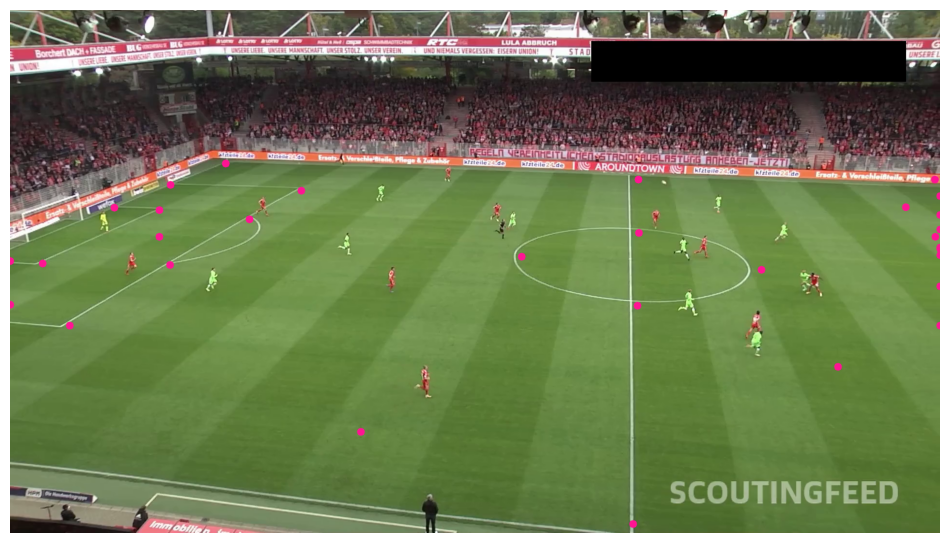

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

**Note:** Notice that some of the keypoints we detected are in incorrect locations. These are keypoints with a low confidence level. Let's filter out these keypoints and keep only the ones the model is confident about.

## filter low confidence keypoints

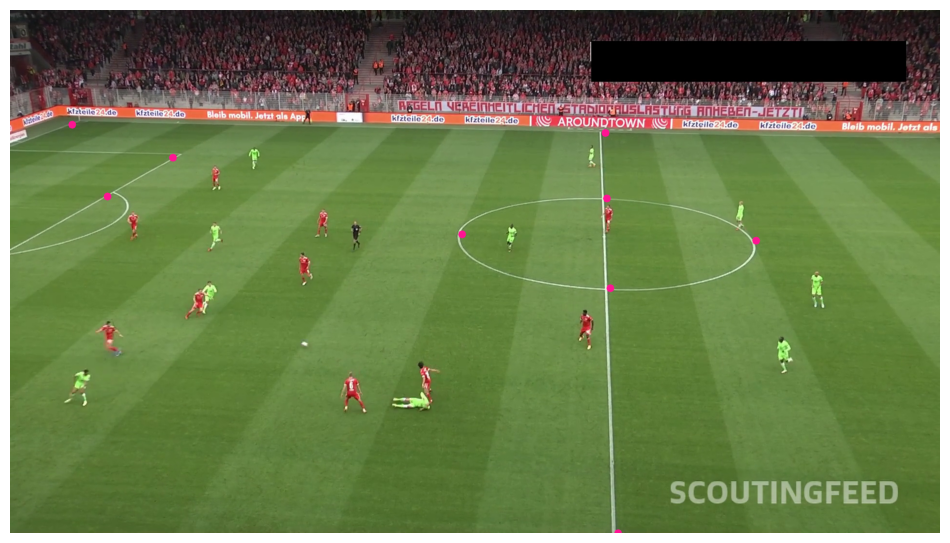

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

## project pitch lines on frame

**Note:** The [sports](https://github.com/roboflow/sports) repository contains a [`SoccerPitchConfiguration`](https://github.com/roboflow/sports/blob/06053616f1f8a8ae1fa936eb00dcdc2e4f888bb1/sports/configs/soccer.py#L6) that provides information about the real-world geometry of the soccer pitch. It also includes utilities for visualizing elements located on the pitch.

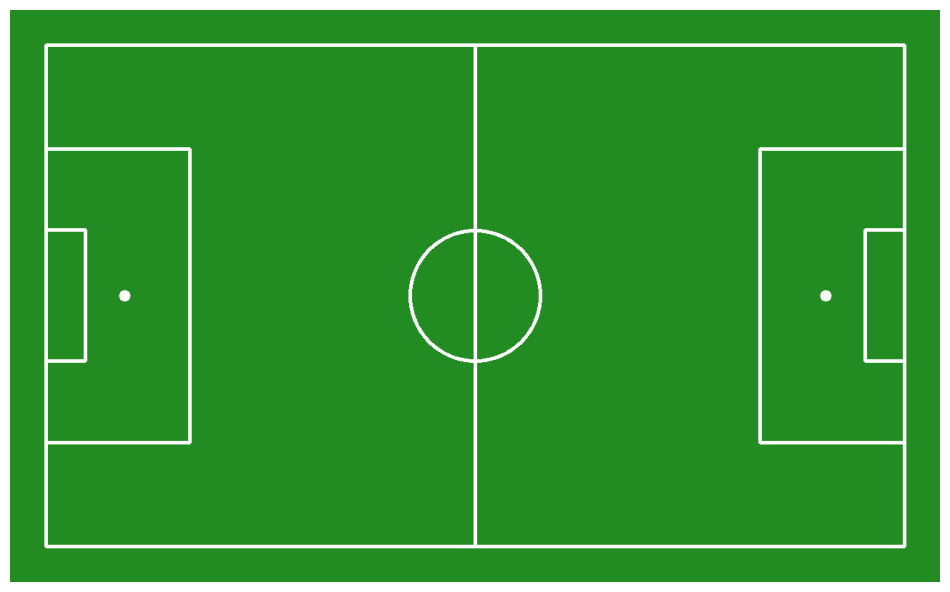

In [ ]:
from sports.annotators.soccer import draw_pitch
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

**Note:** It's time to utilize the keypoint pairs located on the camera perspective plane and the football pitch plane. The [sports](https://github.com/roboflow/sports) repository includes a [`ViewTransformer`](https://github.com/roboflow/sports/blob/06053616f1f8a8ae1fa936eb00dcdc2e4f888bb1/sports/common/view.py#L7), which employs homography for perspective transformation.

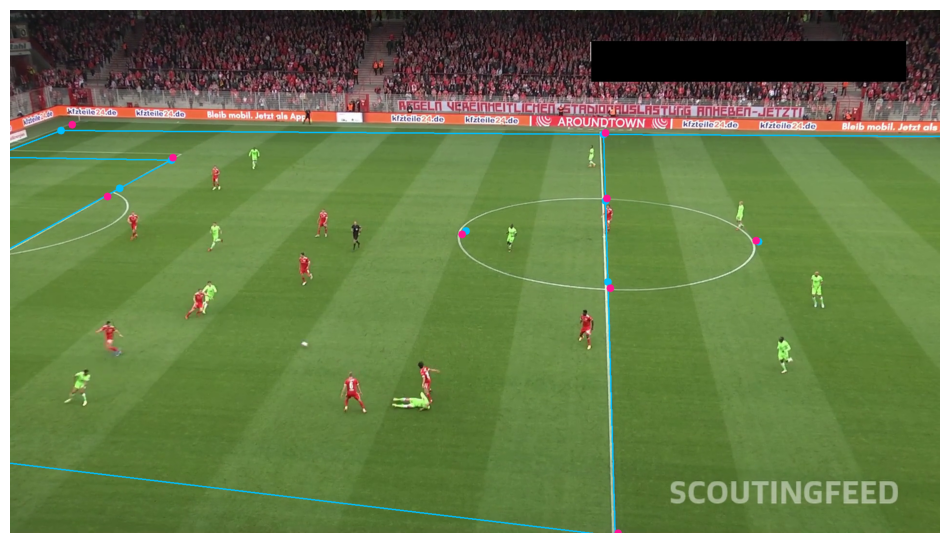

In [ ]:
import numpy as np
import supervision as sv
from sports.common.view import ViewTransformer

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

pitch_all_points = np.array(CONFIG.vertices)
frame_all_points = transformer.transform_points(points=pitch_all_points)

frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator_2.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

## project ball, players and referies on pitch

In [ ]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 25it [00:04,  5.58it/s]
Embedding extraction: 18it [00:03,  4.68it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
import cv2
from typing import Optional

def draw_pitch_voronoi_diagram_2(
    config: SoccerPitchConfiguration,
    team_1_xy: np.ndarray,
    team_2_xy: np.ndarray,
    team_1_color: sv.Color = sv.Color.RED,
    team_2_color: sv.Color = sv.Color.WHITE,
    opacity: float = 0.5,
    padding: int = 50,
    scale: float = 0.1,
    pitch: Optional[np.ndarray] = None
) -> np.ndarray:
    """
    Draws a Voronoi diagram on a soccer pitch representing the control areas of two
    teams with smooth color transitions.

    Args:
        config (SoccerPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        team_1_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 1.
        team_2_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 2.
        team_1_color (sv.Color, optional): Color representing the control area of
            team 1. Defaults to sv.Color.RED.
        team_2_color (sv.Color, optional): Color representing the control area of
            team 2. Defaults to sv.Color.WHITE.
        opacity (float, optional): Opacity of the Voronoi diagram overlay.
            Defaults to 0.5.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.
        pitch (Optional[np.ndarray], optional): Existing pitch image to draw the
            Voronoi diagram on. If None, a new pitch will be created. Defaults to None.

    Returns:
        np.ndarray: Image of the soccer pitch with the Voronoi diagram overlay.
    """
    if pitch is None:
        pitch = draw_pitch(
            config=config,
            padding=padding,
            scale=scale
        )

    scaled_width = int(config.width * scale)
    scaled_length = int(config.length * scale)

    voronoi = np.zeros_like(pitch, dtype=np.uint8)

    team_1_color_bgr = np.array(team_1_color.as_bgr(), dtype=np.uint8)
    team_2_color_bgr = np.array(team_2_color.as_bgr(), dtype=np.uint8)

    y_coordinates, x_coordinates = np.indices((
        scaled_width + 2 * padding,
        scaled_length + 2 * padding
    ))

    y_coordinates -= padding
    x_coordinates -= padding

    def calculate_distances(xy, x_coordinates, y_coordinates):
        return np.sqrt((xy[:, 0][:, None, None] * scale - x_coordinates) ** 2 +
                       (xy[:, 1][:, None, None] * scale - y_coordinates) ** 2)

    distances_team_1 = calculate_distances(team_1_xy, x_coordinates, y_coordinates)
    distances_team_2 = calculate_distances(team_2_xy, x_coordinates, y_coordinates)

    min_distances_team_1 = np.min(distances_team_1, axis=0)
    min_distances_team_2 = np.min(distances_team_2, axis=0)

    # Increase steepness of the blend effect
    steepness = 15  # Increased steepness for sharper transition
    distance_ratio = min_distances_team_2 / np.clip(min_distances_team_1 + min_distances_team_2, a_min=1e-5, a_max=None)
    blend_factor = np.tanh((distance_ratio - 0.5) * steepness) * 0.5 + 0.5

    # Create the smooth color transition
    for c in range(3):  # Iterate over the B, G, R channels
        voronoi[:, :, c] = (blend_factor * team_1_color_bgr[c] +
                            (1 - blend_factor) * team_2_color_bgr[c]).astype(np.uint8)

    overlay = cv2.addWeighted(voronoi, opacity, pitch, 1 - opacity, 0)

    return overlay

Embedding extraction: 1it [00:00,  8.57it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



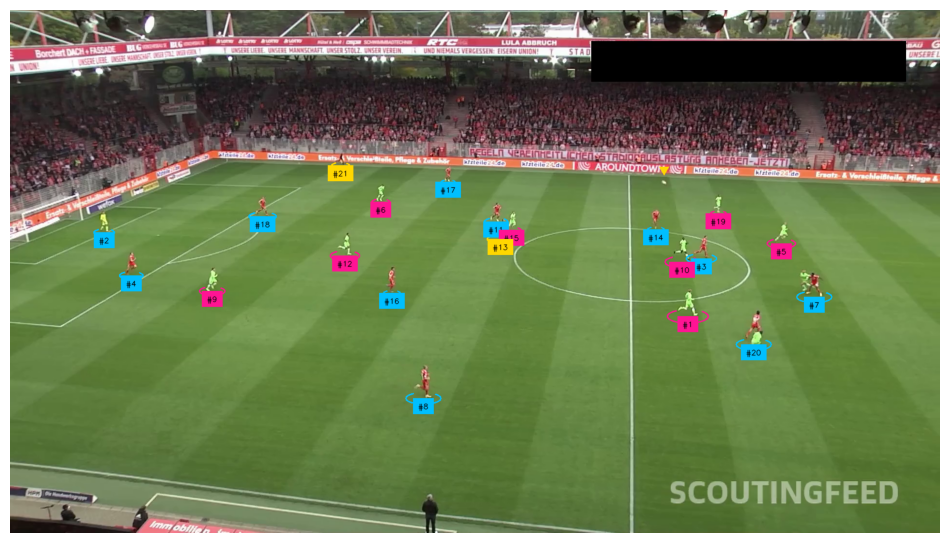

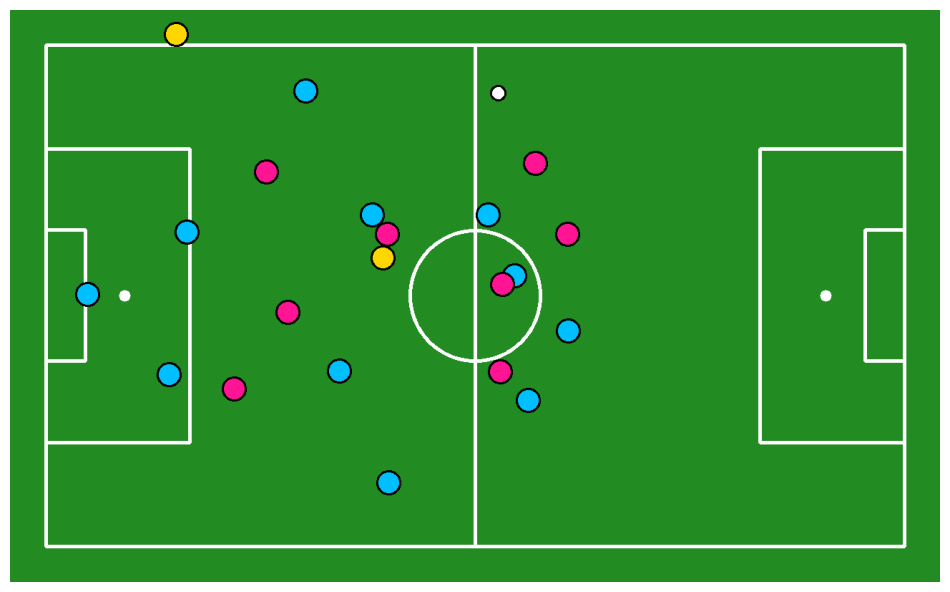

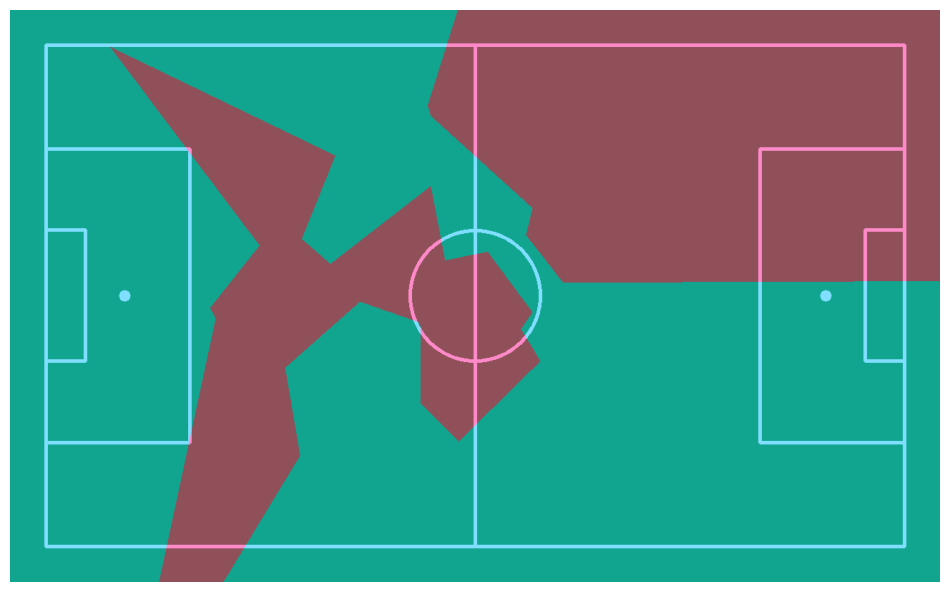

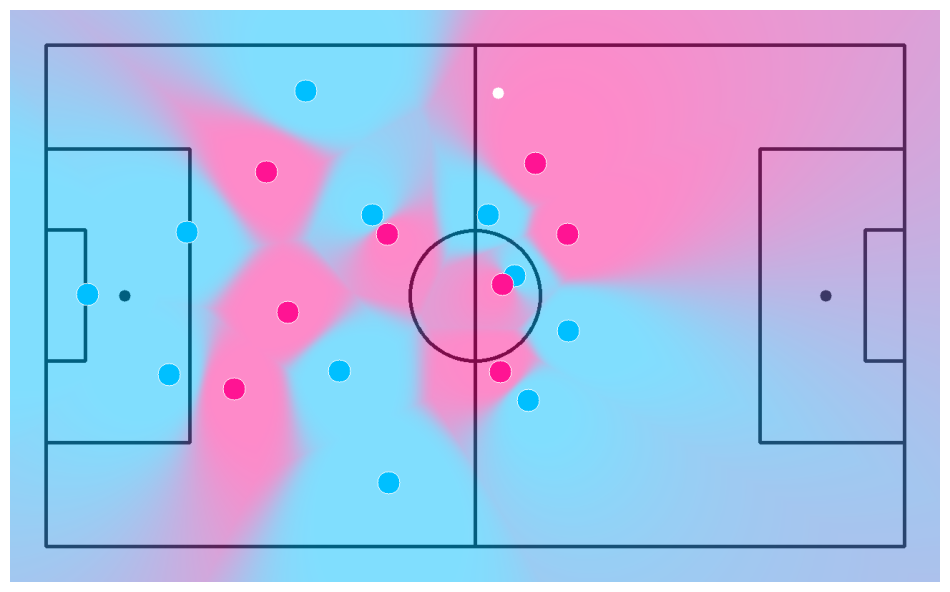

In [ ]:
import supervision as sv
from sports.annotators.soccer import (
    draw_pitch,
    draw_points_on_pitch,
    draw_pitch_voronoi_diagram
)

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# ball, goalkeeper, player, referee detection

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# team assignment

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

# frame visualization

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

players_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections
])

# detect pitch key points

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

# project ball, players and referies on pitch

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referees_xy = transformer.transform_points(points=referees_xy)

# visualize video game-style radar view

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_referees_xy,
    face_color=sv.Color.from_hex('FFD700'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

# visualize voronoi diagram

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_pitch_voronoi_diagram(
    config=CONFIG,
    team_1_xy=pitch_players_xy[players_detections.class_id == 0],
    team_2_xy=pitch_players_xy[players_detections.class_id == 1],
    team_1_color=sv.Color.from_hex('00BFFF'),
    team_2_color=sv.Color.from_hex('FF1493'),
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

# visualize voronoi diagram with blend

annotated_frame = draw_pitch(
    config=CONFIG,
    background_color=sv.Color.WHITE,
    line_color=sv.Color.BLACK
)
annotated_frame = draw_pitch_voronoi_diagram_2(
    config=CONFIG,
    team_1_xy=pitch_players_xy[players_detections.class_id == 0],
    team_2_xy=pitch_players_xy[players_detections.class_id == 1],
    team_1_color=sv.Color.from_hex('00BFFF'),
    team_2_color=sv.Color.from_hex('FF1493'),
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.WHITE,
    radius=8,
    thickness=1,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.WHITE,
    radius=16,
    thickness=1,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.WHITE,
    radius=16,
    thickness=1,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

## ball tracking

In [ ]:
from collections import deque
import supervision as sv
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
MAXLEN = 5

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

path_raw = []
M = deque(maxlen=MAXLEN)

for frame in tqdm(frame_generator, total=video_info.total_frames):

    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)

    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    key_points = sv.KeyPoints.from_inference(result)

    filter = key_points.confidence[0] > 0.5
    frame_reference_points = key_points.xy[0][filter]
    pitch_reference_points = np.array(CONFIG.vertices)[filter]

    transformer = ViewTransformer(
        source=frame_reference_points,
        target=pitch_reference_points
    )
    M.append(transformer.m)
    transformer.m = np.mean(np.array(M), axis=0)

    frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

    path_raw.append(pitch_ball_xy)

100%|██████████| 750/750 [02:00<00:00,  6.20it/s]


In [ ]:
path = [
    np.empty((0, 2), dtype=np.float32) if coorinates.shape[0] >= 2 else coorinates
    for coorinates
    in path_raw
]

path = [coorinates.flatten() for coorinates in path]

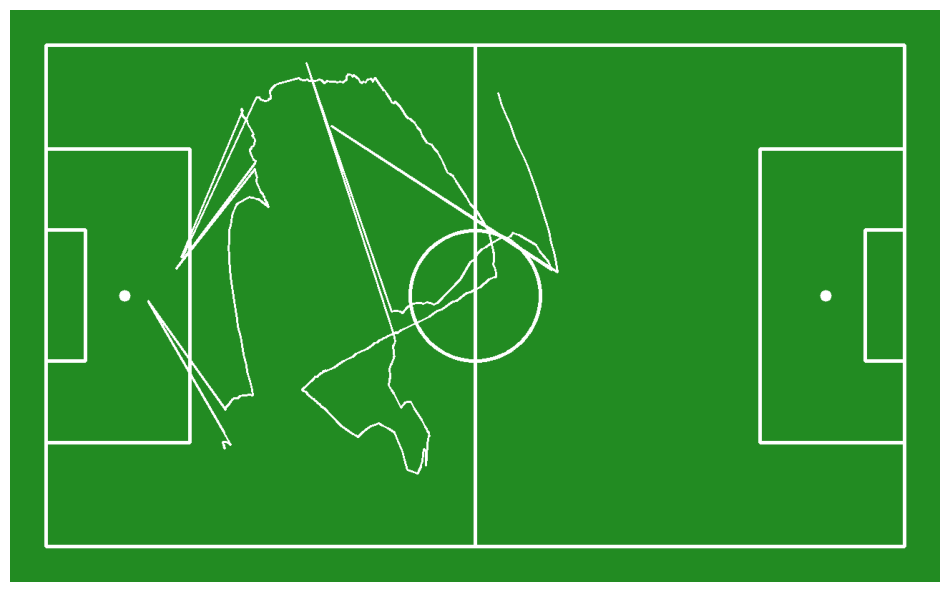

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

In [ ]:
from typing import List, Union

def replace_outliers_based_on_distance(
    positions: List[np.ndarray],
    distance_threshold: float
) -> List[np.ndarray]:
    last_valid_position: Union[np.ndarray, None] = None
    cleaned_positions: List[np.ndarray] = []

    for position in positions:
        if len(position) == 0:
            # If the current position is already empty, just add it to the cleaned positions
            cleaned_positions.append(position)
        else:
            if last_valid_position is None:
                # If there's no valid last position, accept the first valid one
                cleaned_positions.append(position)
                last_valid_position = position
            else:
                # Calculate the distance from the last valid position
                distance = np.linalg.norm(position - last_valid_position)
                if distance > distance_threshold:
                    # Replace with empty array if the distance exceeds the threshold
                    cleaned_positions.append(np.array([], dtype=np.float64))
                else:
                    cleaned_positions.append(position)
                    last_valid_position = position

    return cleaned_positions

In [ ]:
MAX_DISTANCE_THRESHOLD = 500

path = replace_outliers_based_on_distance(path, MAX_DISTANCE_THRESHOLD)

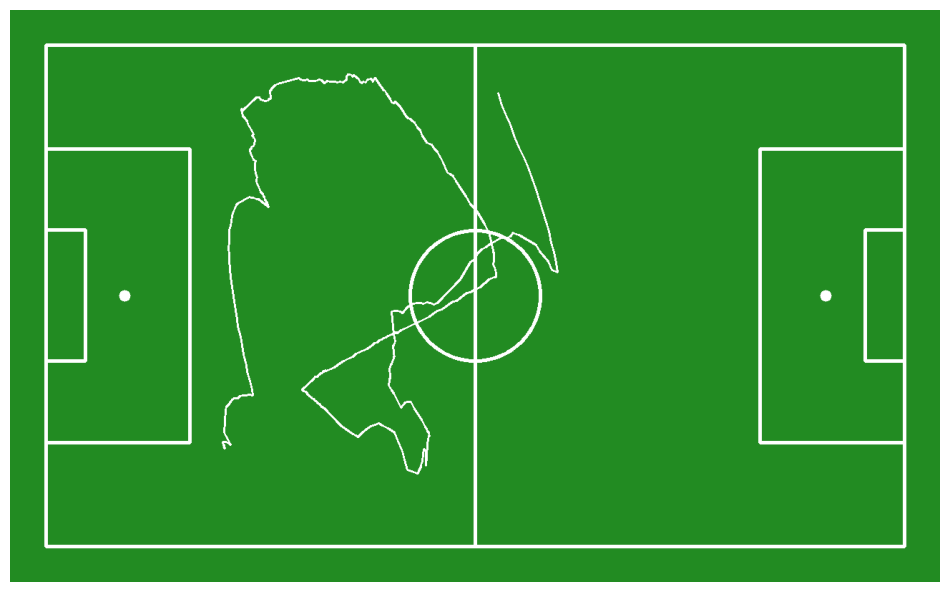

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)